## **Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.**

**Load the Dataset**

In [286]:
#Installing ucimlrepo package
!pip install ucimlrepo

In [287]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo, list_available_datasets
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
from scipy import stats
from scipy.stats import zscore

def printmd(string):
    display(Markdown(string))
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, accuracy_score

In [288]:
#List of UCI repositories with ID
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [289]:
# Fetch the 'adult' dataset from UCI repository where id for dataset is 2
adultDataset = fetch_ucirepo(id=2)

In [290]:
#Creating dataframe by joining features and target
Xdata = pd.DataFrame(adultDataset.data.features)
Ydata = pd.DataFrame(adultDataset.data.targets, columns=['income'])
adultDataFrame = pd.concat([Xdata,Ydata], axis = 1)
adultDataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [291]:
# Displaying first 10 rows of dataset
adultDataFrame.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [292]:
# Displaying 5 rows using sample function
adultDataFrame.sample(n=5,random_state = 42)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K


In [293]:
# Examining columns using info
adultDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [318]:
duplicates = adultDataFrame[adultDataFrame.duplicated()]
duplicates
#adultDataFrame.duplicated().sum()
duplicates[duplicates['fnlwgt'] == 308144]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [294]:
# Checking for missing values using isnull
adultDataFrame.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [295]:
# Summary statistics for numerical columns using describe 
adultDataFrame.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [296]:
# For checking summary statistics for categorical columns
adultDataFrame.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


**Data Cleaning and Preprocessing
Handle missing values by either removing rows or filling them with appropriate values (mean, median, mode, etc.). Correct data types if needed. Address any outliers or anomalies**

In [297]:
#checking for null values in the columns
adultDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [298]:
adultDataFrame.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [299]:
(adultDataFrame == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [300]:
#replacing the ? with null values
adult_df_cleaned = adultDataFrame.replace('?', np.nan)
adult_df_cleaned.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [301]:
row_withnullval = adult_df_cleaned[adult_df_cleaned['workclass'].isnull()]
row_withnullval.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [302]:
adult_df_cleaned['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [303]:
adult_df_cleaned['income'].replace('<=50K.', '<=50K',inplace = True)
adult_df_cleaned['income'].replace('>50K.', '>50K',inplace = True)
adult_df_cleaned['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [304]:
adult_df_cleaned.to_excel("output.xlsx", index=False)

In [277]:
df = adult_df_cleaned[adult_df_cleaned['native-country'].isnull()]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48245,46,Private,31411,11th,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,NaN,<=50K
48272,24,Private,127159,Some-college,10,Never-married,Other-service,Other-relative,White,Female,0,0,24,NaN,<=50K
48604,24,State-gov,161783,Bachelors,13,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,40,NaN,<=50K
48651,34,Private,143776,Masters,14,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,NaN,>50K


In [278]:
adult_df_cleaned['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [285]:
adult_df_cleaned['occupation'].value_counts()
#adult_df_cleaned[adult_df_cleaned['occupation'].isnull()]

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [282]:
# 43832+857    44648

44689

In [226]:
#filling the missing values for workclass column

#identify missing values in workclass column
test_data = adult_df_cleaned[(adult_df_cleaned['workclass'].isnull())].copy()
test_label = test_data.workclass

train_data = adult_df_cleaned[(adult_df_cleaned['workclass'].notnull())].copy()
train_label = train_data.workclass

#remove the workclass column from train data and test data
test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'workclass'
majority_class = adult_df_cleaned.workclass.value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['workclass'].isnull()
adult_df_cleaned.loc[mask, 'workclass'] = overall_pred.values

# Verify the results
print(adult_df_cleaned.workclass.value_counts())
print(adult_df_cleaned.workclass.unique())

workclass
Private             36675
Self-emp-not-inc     3874
Local-gov            3149
State-gov            1982
Self-emp-inc         1696
Federal-gov          1432
Without-pay            21
Never-worked           13
Name: count, dtype: int64
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay']


In [107]:
#filling the missing values for occupation column

#identify missing values in occupation column
test_data = adult_df_cleaned[(adult_df_cleaned['occupation'].isnull())].copy()
test_label = test_data.occupation

train_data = adult_df_cleaned[(adult_df_cleaned['occupation'].notnull())].copy()
train_label = train_data.occupation

#remove the occupation column from train data and test data
test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'occupation'
majority_class = adult_df_cleaned.occupation.value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['occupation'].isnull()
adult_df_cleaned.loc[mask, 'occupation'] = overall_pred.values

# Verify the results
print(adult_df_cleaned.occupation.value_counts())
print(adult_df_cleaned.occupation.unique())

occupation
Prof-specialty       7666
Craft-repair         6527
Exec-managerial      6149
Adm-clerical         5775
Sales                5659
Other-service        5217
Machine-op-inspct    3090
Transport-moving     2404
Handlers-cleaners    2131
Farming-fishing      1507
Tech-support         1462
Protective-serv       989
Priv-house-serv       251
Armed-Forces           15
Name: count, dtype: int64
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [279]:
#filling the missing values for native-country column

#identify missing values in native-country column
test_data = adult_df_cleaned[(adult_df_cleaned['native-country'].isnull())].copy()
test_label = test_data['native-country']

train_data = adult_df_cleaned[(adult_df_cleaned['native-country'].notnull())].copy()
train_label = train_data['native-country']

#remove the native-country column from train data and test data
test_data.drop(columns = ['native-country'], inplace = True)
train_data.drop(columns = ['native-country'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'occupation'
majority_class = adult_df_cleaned['native-country'].value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['native-country'].isnull()
adult_df_cleaned.loc[mask, 'native-country'] = overall_pred.values

# Verify the results
print(adult_df_cleaned['native-country'].value_counts())
print(adult_df_cleaned['native-country'].unique())

native-country
United-States                 44648
Mexico                          964
Philippines                     304
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           154
Cuba                            138
England                         127
China                           125
South                           120
Jamaica                         107
Italy                           105
Dominican-Republic              104
Japan                            94
Guatemala                        89
Poland                           87
Vietnam                          87
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [281]:
adult_df_cleaned['native-country'].value_counts()

native-country
United-States                 44648
Mexico                          964
Philippines                     304
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           154
Cuba                            138
England                         127
China                           125
South                           120
Jamaica                         107
Italy                           105
Dominican-Republic              104
Japan                            94
Guatemala                        89
Poland                           87
Vietnam                          87
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [ ]:
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                          45
France                           38
Ireland                          37
Hong                             30
Thailand                         30
Cambodia                         28
Trinadad&Tobago                  27
Laos                             23
Yugoslavia                       23
Outlying-US(Guam-USVI-etc)       23
Scotland                         21
Honduras                         20
Hungary                          19
Holand-Netherlands                1
Name: count, dtype: int64
#
1
adult_df_cleaned['occupa

In [109]:
adult_df_cleaned.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [110]:
#detecting the outliers using Z-score
checkVisualisedf = adult_df_cleaned
# Select numeric columns
numeric_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = checkVisualisedf[numeric_columns]
# Calculate Z-scores
#z_scores = np.abs(stats.zscore(numeric_data))
z_scores = numeric_data.apply(zscore).abs()
print(z_scores)
# Set a threshold for what you consider an outlier (e.g., Z-score > 3)
threshold = 3

# Display the outliers
outliers_list = {}
for col in numeric_columns:
    # Identify outliers in the column
    is_outlier = z_scores[col] > threshold
    outliers_in_col = numeric_data[col][is_outlier]
    
    # Store outliers in the list
    outliers_list[col] = outliers_in_col
    
    # Print results
    num_outliers = len(outliers_in_col)
    print(f"Outliers in '{col}': {num_outliers} found.")
    # if num_outliers > 0:
    #     print(outliers_in_col.head())  # Display first few outliers for each column

            age  education-num  capital-gain  capital-loss  hours-per-week
0      0.025996       1.136512      0.146932      0.217127        0.034087
1      0.828308       1.136512      0.144804      0.217127        2.213032
2      0.046942       0.419335      0.144804      0.217127        0.034087
3      1.047121       1.197259      0.144804      0.217127        0.034087
4      0.776316       1.136512      0.144804      0.217127        0.034087
...         ...            ...           ...           ...             ...
48837  0.025996       1.136512      0.144804      0.217127        0.356894
48838  1.849433       0.419335      0.144804      0.217127        0.034087
48839  0.046942       1.136512      0.144804      0.217127        0.772930
48840  0.390683       1.136512      0.587220      0.217127        0.034087
48841  0.265754       1.136512      0.144804      0.217127        1.579946

[48842 rows x 5 columns]
Outliers in 'age': 186 found.
Outliers in 'education-num': 330 found.
Outl

In [111]:
#detecting the outliers using IQR method
checkVisualisedf = adult_df_cleaned
# Select numeric columns
numeric_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = checkVisualisedf[numeric_columns]
# Use IQR method to find outliers
def find_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(str(upper_bound) + " -- " + str(lower_bound))
    return outliers

# Get outliers
outliers = find_outliers_iqr(numeric_data)
print(outliers)
# Output the number of outliers and some sample outlier values
for col, outlier_data in outliers.items():
    print(f"Outliers in '{col}': {len(outlier_data)} found.")
    print(outlier_data.head())  # Display the first few outliers for each column

78.0 -- -2.0
16.5 -- 4.5
0.0 -- 0.0
0.0 -- 0.0
52.5 -- 32.5
{'age': 74       79
222      90
430      80
918      81
1040     90
         ..
48524    80
48564    80
48667    83
48709    79
48812    81
Name: age, Length: 216, dtype: int64, 'education-num': 15       4
56       3
61       4
79       4
160      2
        ..
48638    4
48645    4
48766    4
48782    4
48791    4
Name: education-num, Length: 1794, dtype: int64, 'capital-gain': 0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
48805     5178
48812     2936
48813     7688
48822    15024
48840     5455
Name: capital-gain, Length: 4035, dtype: int64, 'capital-loss': 23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
48783    1602
48794    2057
48802    1590
48814    1669
48816    1902
Name: capital-loss, Length: 2282, dtype: int64, 'hours-per-week': 1        13
6        16
10       80
12       30
20       60
         ..
48820     8
48822    55
48825    32
48

**Z-score is better for normally distributed data. IQR is better for non-normal data or when you're dealing 
with skewed distributions or extreme outliers.**

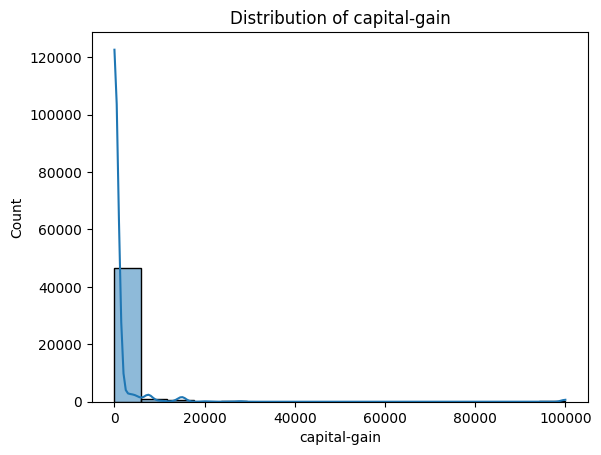

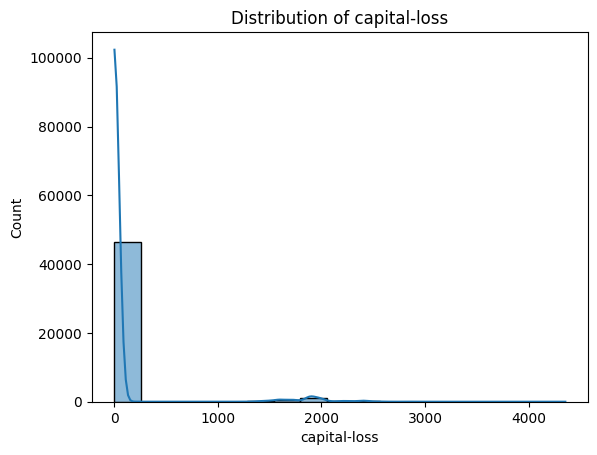

In [190]:
#Treating the outliers
#check for the skewness
sns.histplot(adult_df_cleaned['capital-gain'], kde=True)
plt.title('Distribution of capital-gain')
plt.show()

sns.histplot(adult_df_cleaned['capital-loss'], kde=True)
plt.title('Distribution of capital-loss')
plt.show()

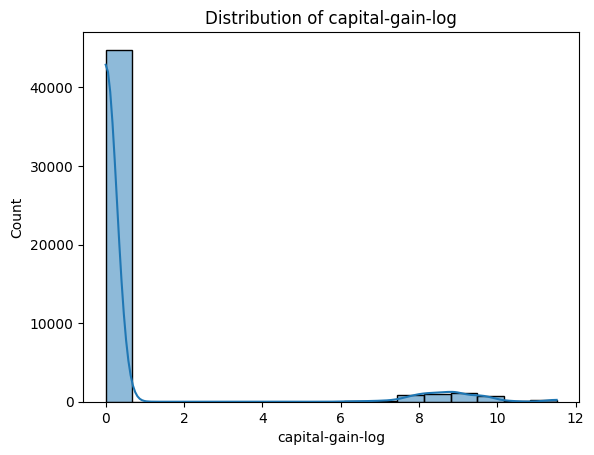

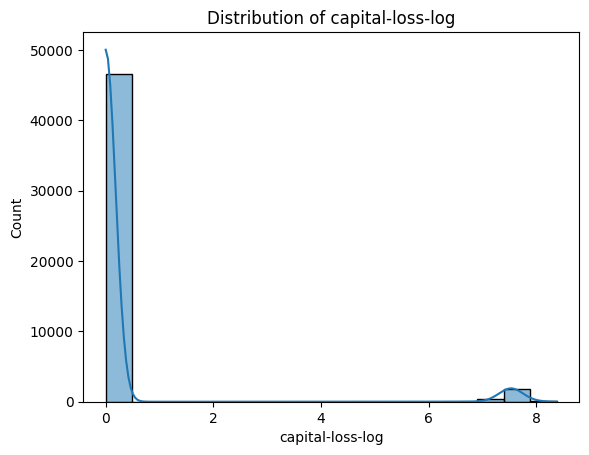

In [113]:
#applying log transformation and cheking the skeweness
adult_df_cleaned['capital-gain-log'] = np.log(adult_df_cleaned['capital-gain'] + 1)
adult_df_cleaned['capital-loss-log'] = np.log(adult_df_cleaned['capital-loss'] + 1)

sns.histplot(adult_df_cleaned['capital-gain-log'], kde=True)
plt.title('Distribution of capital-gain-log')
plt.show()

sns.histplot(adult_df_cleaned['capital-loss-log'], kde=True)
plt.title('Distribution of capital-loss-log')
plt.show()

In [193]:
df = adult_df_cleaned[['capital-gain','capital-gain-log']]
df[df['capital-gain'] == 0]

,capital-gain,capital-gain-log
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
...,...,...
48836,0,0.0
48837,0,0.0
48838,0,0.0
48839,0,0.0


In [115]:
adult_df_cleaned['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [116]:
df = adult_df_cleaned.sort_values(by='capital-gain',ascending = False)
df.iloc[:,255:]

""
39908
12655
2319
14238
41840
...
16968
16969
16970
16971


In [117]:
# 1. Get the first highest value
first_highest = adult_df_cleaned['capital-gain'].max()

# 2. Get the second highest value
second_highest = adult_df_cleaned['capital-gain'][adult_df_cleaned['capital-gain'] != first_highest].max()

second_highest

np.int64(41310)

In [118]:
adult_df_cleaned[(adult_df_cleaned['capital-gain']==99999) & (adult_df_cleaned['income']== 1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain-log,capital-loss-log


In [119]:
cap_value = adult_df_cleaned['capital-gain'].quantile(0.98)
cap_value

np.float64(14084.0)

In [120]:
adult_df_cleaned['capital-gain-log']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
48837    0.000000
48838    0.000000
48839    0.000000
48840    8.604471
48841    0.000000
Name: capital-gain-log, Length: 48842, dtype: float64

In [121]:
# # Plotting to visualize
# import matplotlib.pyplot as plt
# import seaborn as sns

# checkVisualisedf = adult_df_cleaned
# #fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# #sns.boxplot(x=checkVisualisedf['capital-gain'], ax=axes[0]).set_title('Capital gain')
# sns.boxplot(data = checkVisualisedf['fnlwgt'])
# plt.show()

In [122]:
# #applying square root transformation and cheking the skeweness
# adult_df_cleaned['capital-gain-sqrt'] = np.sqrt(adult_df_cleaned['capital-gain'])
# adult_df_cleaned['capital-loss-sqrt'] = np.sqrt(adult_df_cleaned['capital-loss'])

# sns.histplot(adult_df_cleaned['capital-gain-sqrt'], kde=True)
# plt.title('Distribution of capital-gain-sqrt')
# plt.show()

# sns.histplot(adult_df_cleaned['capital-loss-sqrt'], kde=True)
# plt.title('Distribution of capital-loss-sqrt')
# plt.show()

In [123]:
# #clipping the extreme values
# adult_df_cleaned['capital-gain-clipped'] = adult_df_cleaned['capital-gain'].clip(upper=adult_df_cleaned['capital-gain'].quantile(0.95))
# adult_df_cleaned['capital-loss-clipped'] = adult_df_cleaned['capital-loss'].clip(upper=adult_df_cleaned['capital-loss'].quantile(0.95))

# #adult_df_cleaned[['capital-gain','capital-gain-clipped']].head(20)
# adult_df_cleaned[(adult_df_cleaned['capital-gain']!=0)  & (adult_df_cleaned['capital-gain-clipped'] != 0)][['capital-gain','capital-gain-clipped']]


In [124]:
# #checking the skewness after clipping the extreme values
# sns.histplot(adult_df_cleaned['capital-gain-clipped'], kde=True)
# plt.title('Distribution of capital-gain-clipped')
# plt.show()

# sns.histplot(adult_df_cleaned['capital-loss-clipped'], kde=True)
# plt.title('Distribution of capital-loss-clipped')
# plt.show()

In [125]:
# #box cox 
# adult_df_cleaned['capital-gain-boxcox'], _ = stats.boxcox(adult_df_cleaned['capital-gain'] + 1)
# adult_df_cleaned['capital-loss-boxcox'], _ = stats.boxcox(adult_df_cleaned['capital-loss'] + 1)

# sns.histplot(adult_df_cleaned['capital-gain-boxcox'], kde=True)
# plt.title('Distribution of capital-gain-boxcox')
# plt.show()

# sns.histplot(adult_df_cleaned['capital-loss-boxcox'], kde=True)
# plt.title('Distribution of capital-loss-boxcox')
# plt.show()

**After trying different methods, decided to go with log transformation to treat the outliers because log transformation can help reduce the skewness of these columns(capital-gain and capital-loss) and lessen the impact of large values. Since both columns have values that are non-negative, log transformation works well to normalize the distribution.**

**Exploratory Data Analysis**

**Univariate Analysis**

Univariate Analysis of numerical columns

In [126]:
#checking for numerical columns
adult_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               48842 non-null  int64  
 1   workclass         48842 non-null  object 
 2   fnlwgt            48842 non-null  int64  
 3   education         48842 non-null  object 
 4   education-num     48842 non-null  int64  
 5   marital-status    48842 non-null  object 
 6   occupation        48842 non-null  object 
 7   relationship      48842 non-null  object 
 8   race              48842 non-null  object 
 9   sex               48842 non-null  object 
 10  capital-gain      48842 non-null  int64  
 11  capital-loss      48842 non-null  int64  
 12  hours-per-week    48842 non-null  int64  
 13  native-country    48842 non-null  object 
 14  income            48842 non-null  object 
 15  capital-gain-log  48842 non-null  float64
 16  capital-loss-log  48842 non-null  float6

In [127]:
#checking the first 10 rows of the dataset
adult_df_cleaned.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain-log,capital-loss-log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7.684784,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.000000,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000000,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.000000,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0.000000,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0.000000,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0.000000,0.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,9.552866,0.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,8.552367,0.0


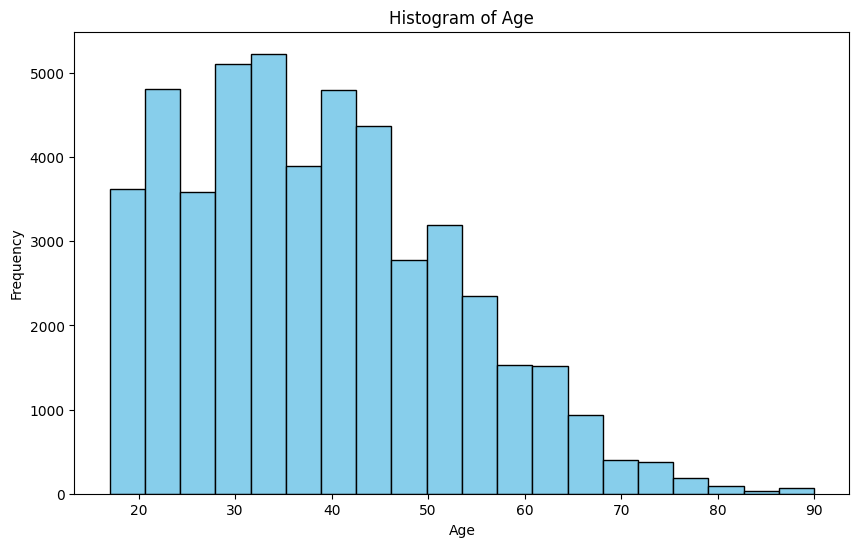

In [128]:
#histogram of age column
plt.figure(figsize=(10, 6))
plt.hist(adult_df_cleaned['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

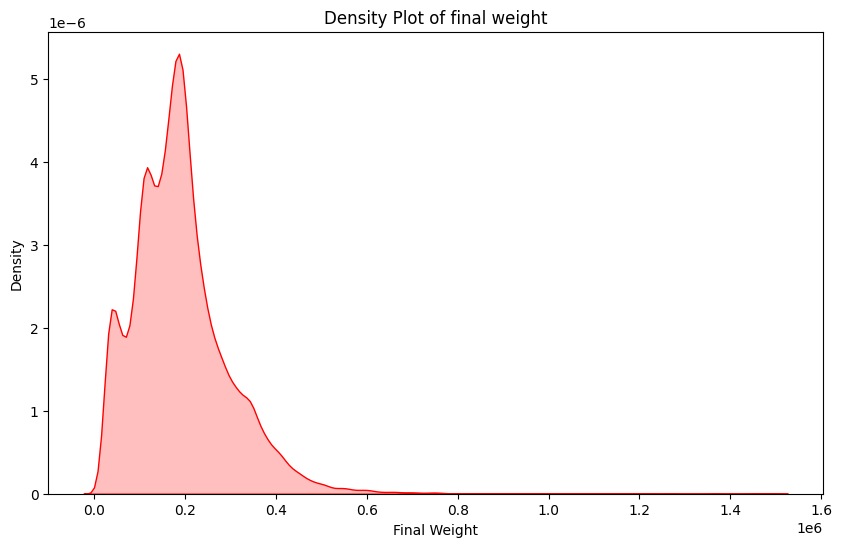

In [129]:
#density plot of fnlwgt column
plt.figure(figsize=(10, 6))
sns.kdeplot(adult_df_cleaned['fnlwgt'], shade=True, color='red')
plt.title('Density Plot of final weight')
plt.xlabel('Final Weight')
plt.ylabel('Density')
plt.show()

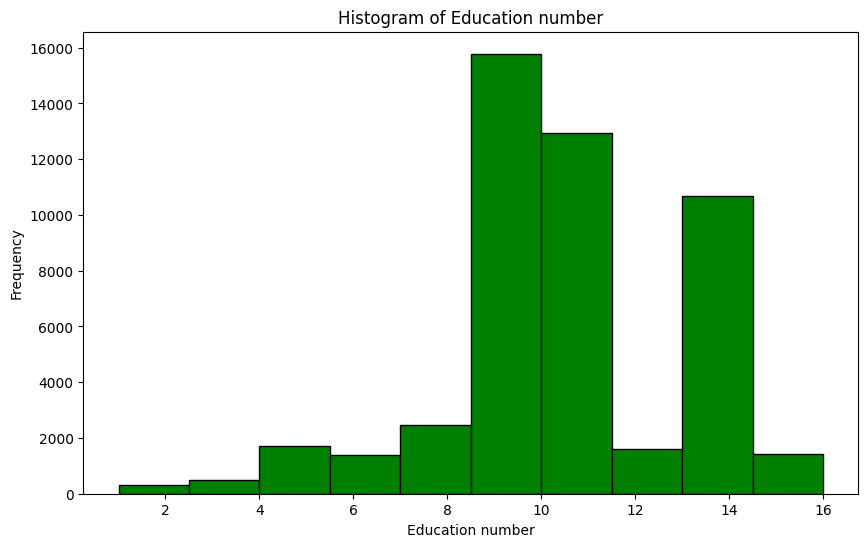

In [130]:
#education num
plt.figure(figsize=(10, 6))
plt.hist(adult_df_cleaned['education-num'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Education number')
plt.xlabel('Education number')
plt.ylabel('Frequency')
plt.show()

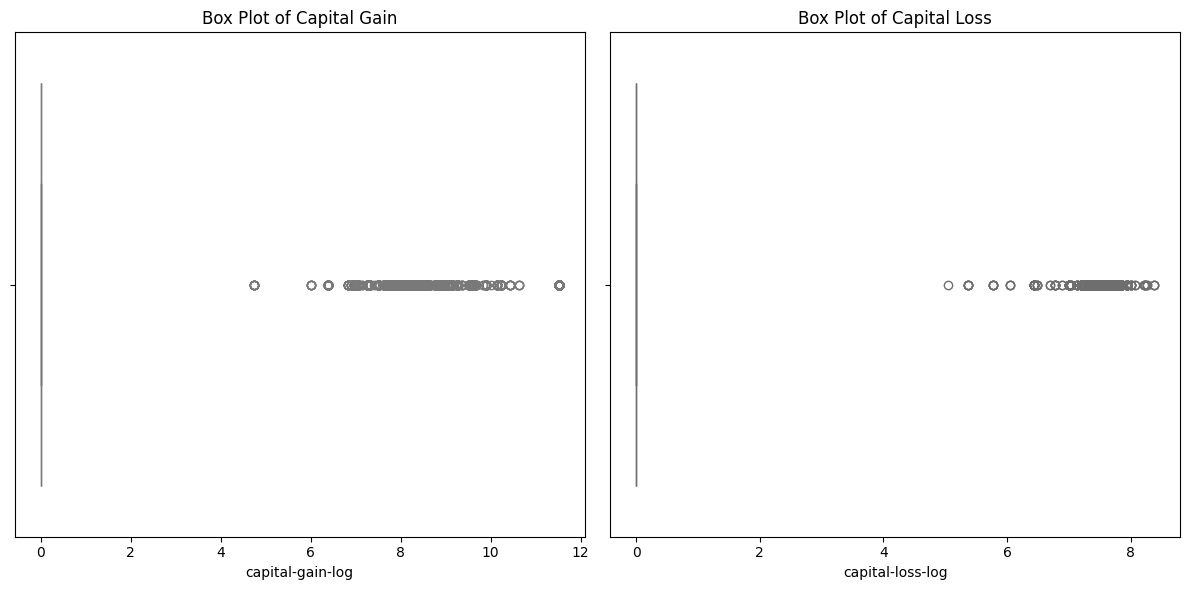

In [131]:
# creating with two subplots for capital gain and capital loss
plt.figure(figsize=(12, 6))

# box plot for capital gain
plt.subplot(1, 2, 1)
sns.boxplot(x=adult_df_cleaned['capital-gain-log'], color='lightblue')
plt.title('Box Plot of Capital Gain')

# box plot for capital loss
plt.subplot(1, 2, 2)
sns.boxplot(x=adult_df_cleaned['capital-loss-log'], color='lightcoral')
plt.title('Box Plot of Capital Loss')

plt.tight_layout()
plt.show()

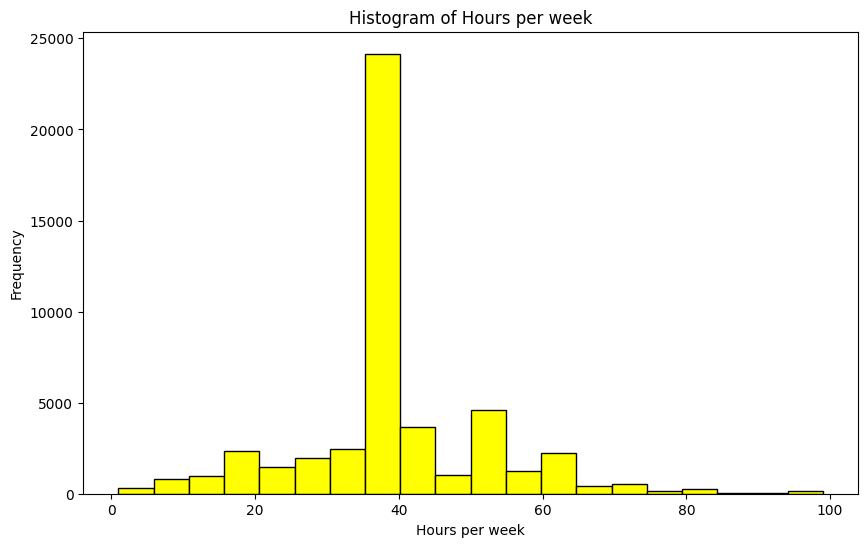

In [132]:
#histogram of hours per week column
plt.figure(figsize=(10, 6))
plt.hist(adult_df_cleaned['hours-per-week'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Hours per week')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.show()

Univariate Analysis for categorical columns

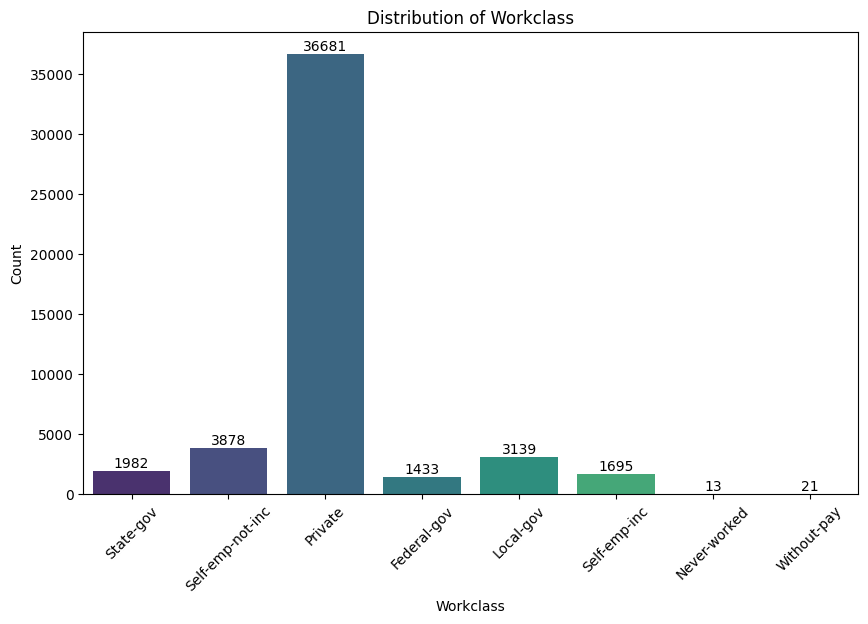

In [133]:
#bar plot for workclass column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='workclass', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

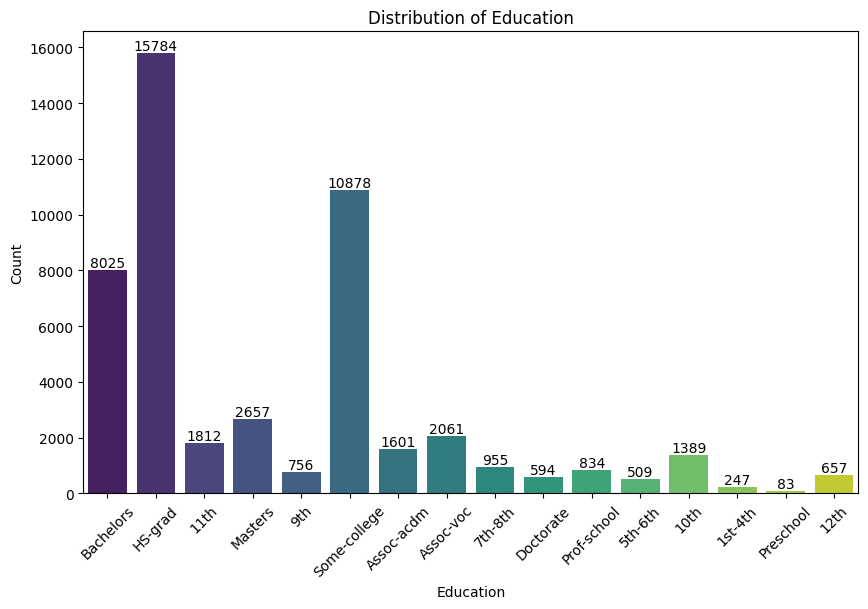

In [134]:
#bar plot for education column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='education', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

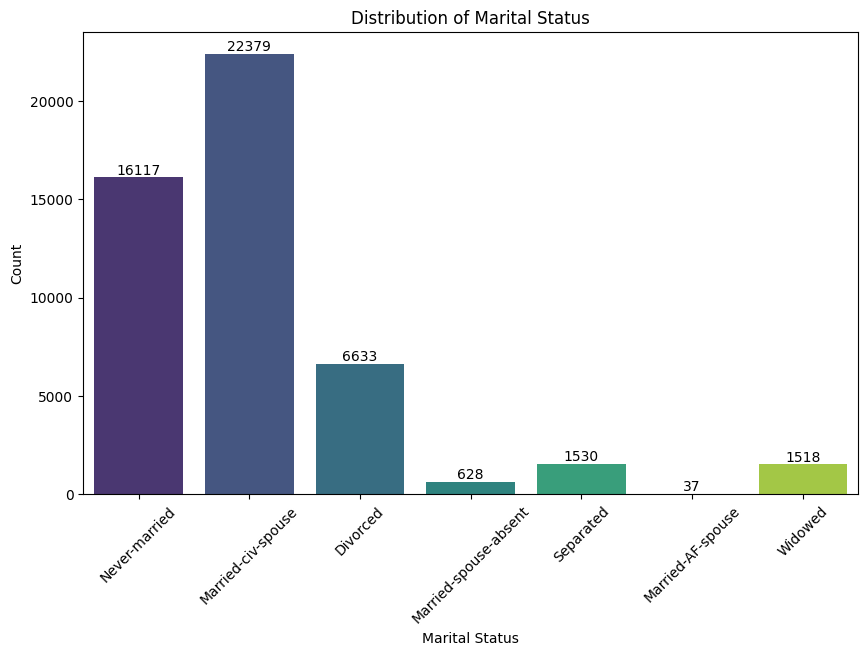

In [135]:
#bar plot for marital status column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='marital-status', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

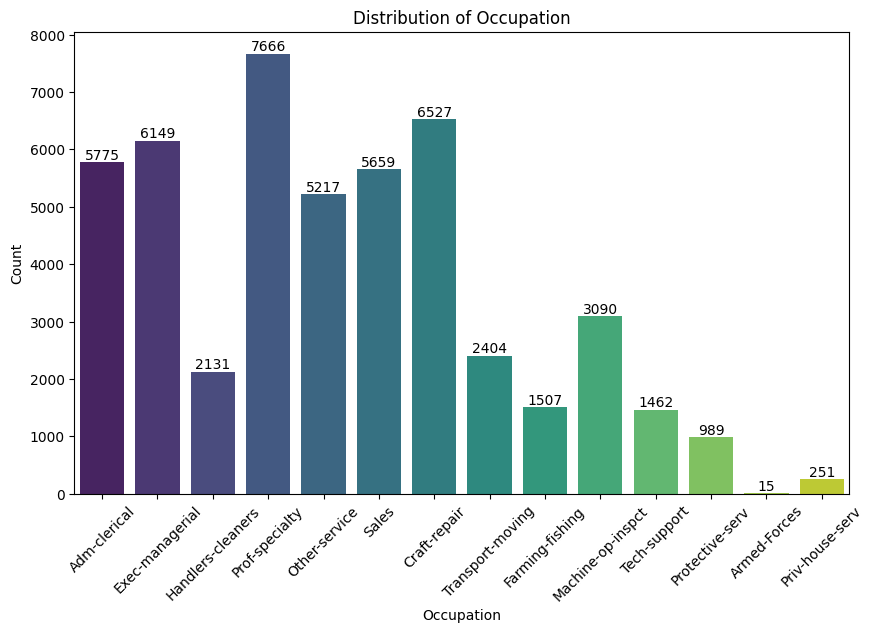

In [136]:
#bar plot for occupation column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='occupation', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

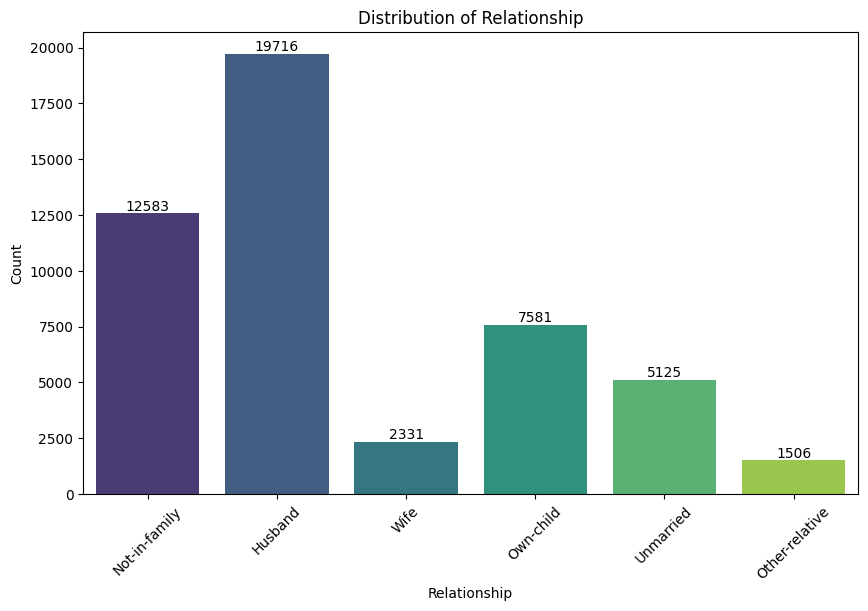

In [137]:
#bar plot for realtionship column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='relationship', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

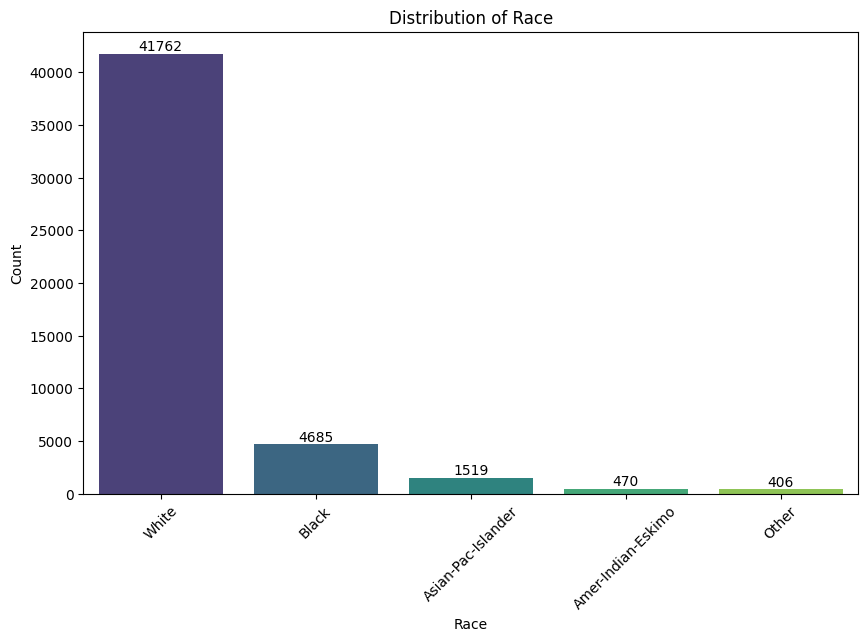

In [138]:
#bar plot for race column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='race', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

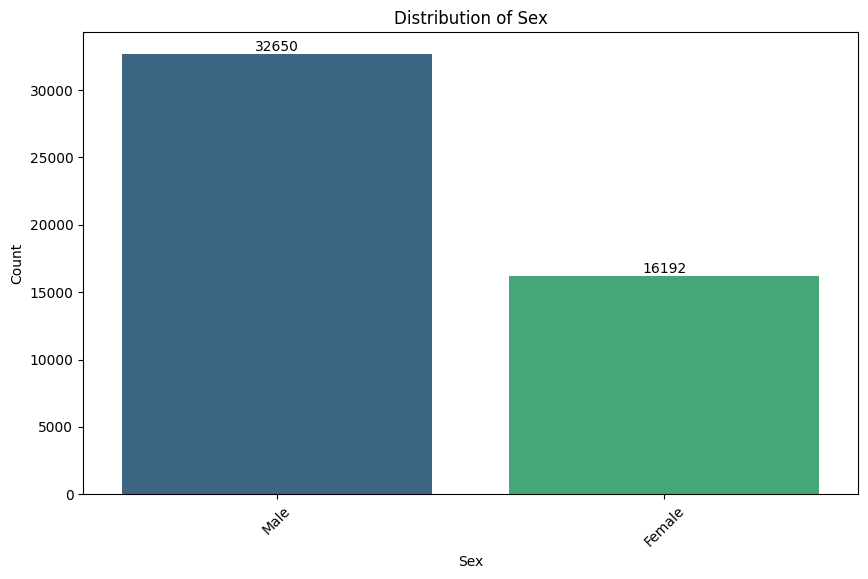

In [139]:
#bar plot for sex column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='sex', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

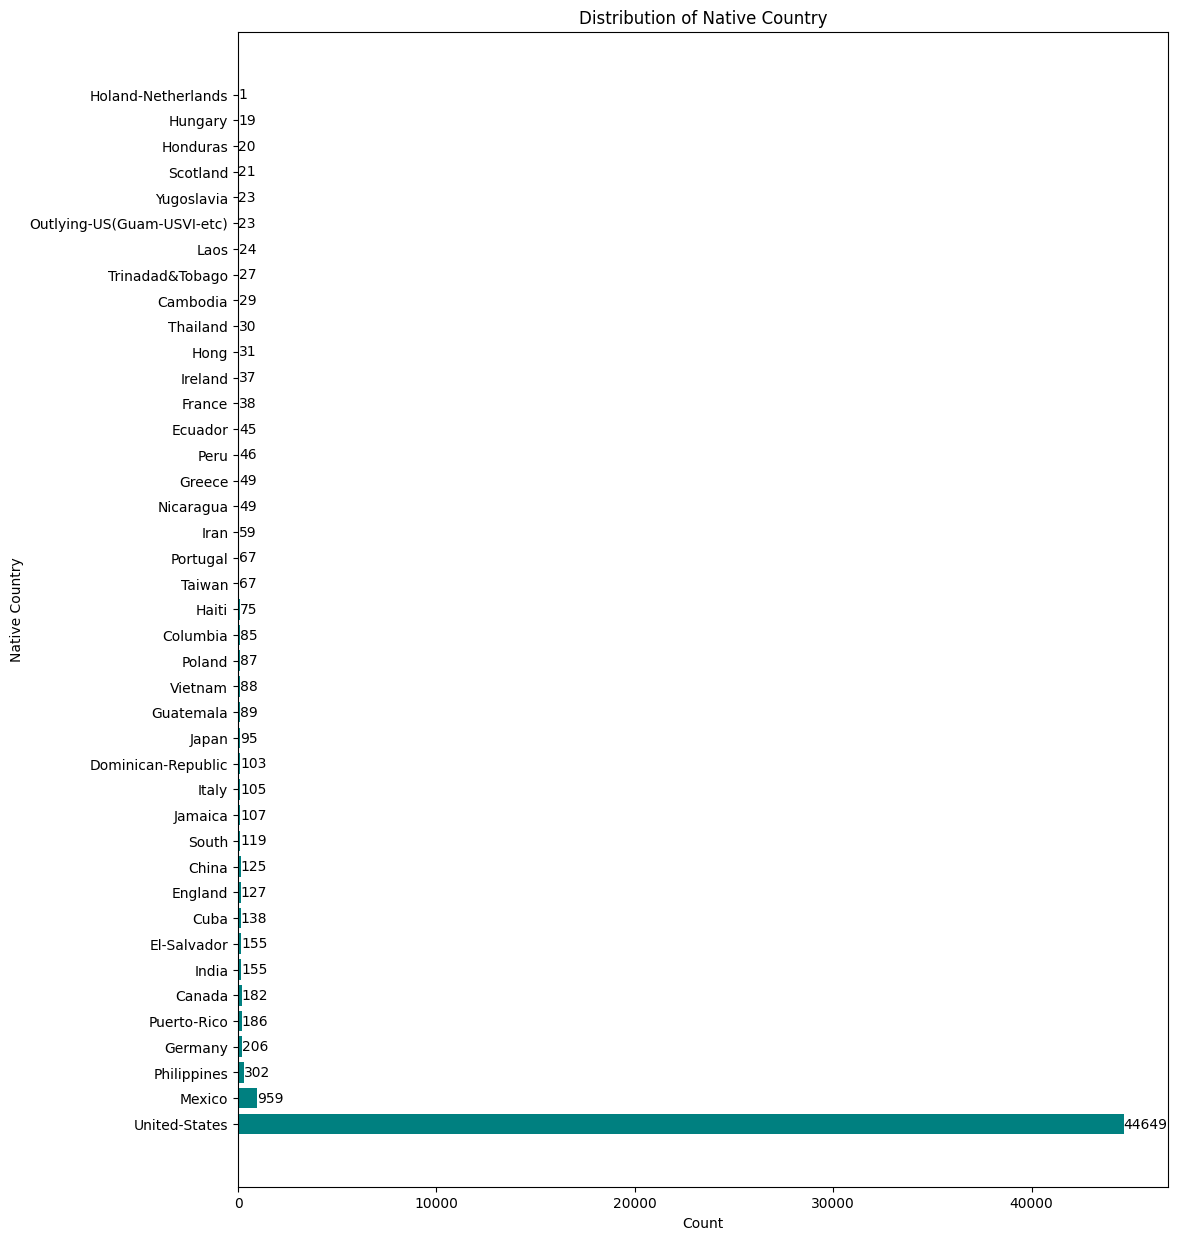

In [140]:
#bar plot for native country
counts = adult_df_cleaned['native-country'].value_counts()
categories = counts.index
values = counts.values

plt.figure(figsize=(12, 15))
plt.barh(categories, values, color='teal')
plt.title('Distribution of Native Country')
plt.xlabel('Count')
plt.ylabel('Native Country')

# annotate bars with counts
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.show()

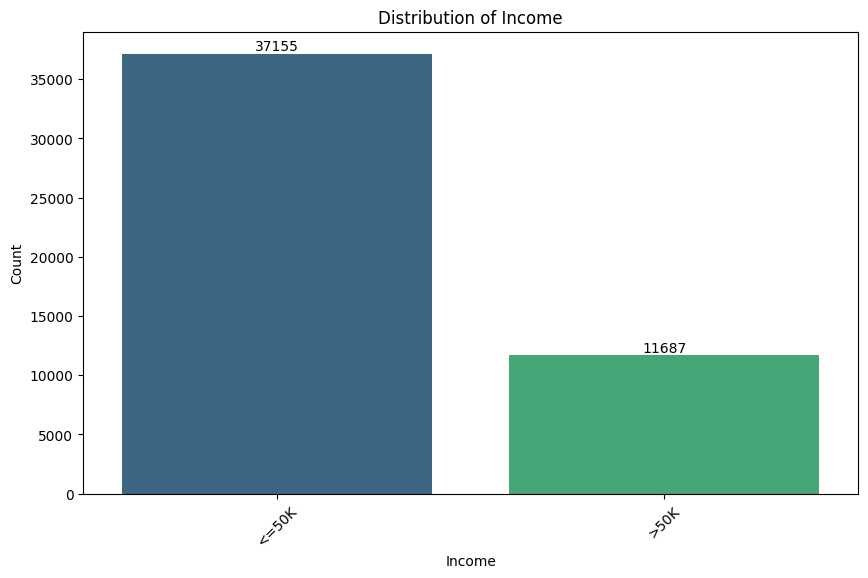

In [141]:
#bar plot for income
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='income', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

**Bivariate Analysis**

In [142]:
adult_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               48842 non-null  int64  
 1   workclass         48842 non-null  object 
 2   fnlwgt            48842 non-null  int64  
 3   education         48842 non-null  object 
 4   education-num     48842 non-null  int64  
 5   marital-status    48842 non-null  object 
 6   occupation        48842 non-null  object 
 7   relationship      48842 non-null  object 
 8   race              48842 non-null  object 
 9   sex               48842 non-null  object 
 10  capital-gain      48842 non-null  int64  
 11  capital-loss      48842 non-null  int64  
 12  hours-per-week    48842 non-null  int64  
 13  native-country    48842 non-null  object 
 14  income            48842 non-null  object 
 15  capital-gain-log  48842 non-null  float64
 16  capital-loss-log  48842 non-null  float6

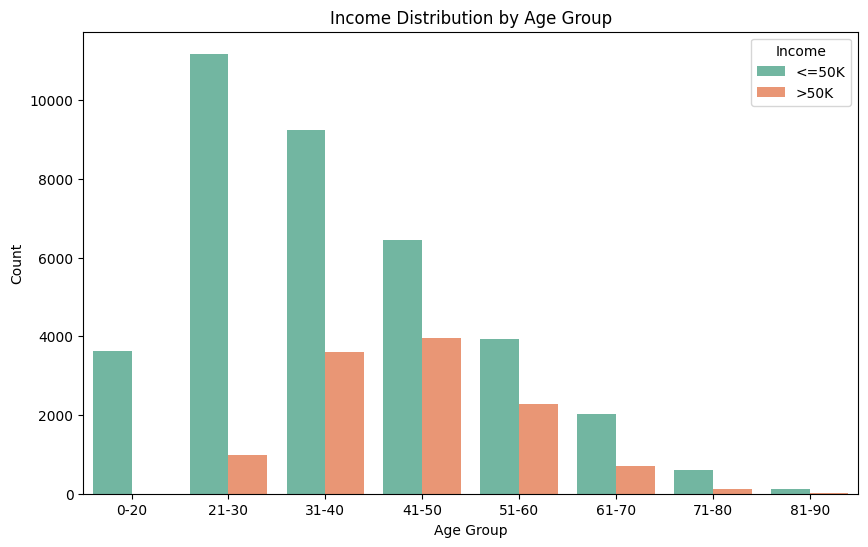

In [143]:
#relationship between age and income
# define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# create a new column for age bins
adult_df_cleaned['age_group'] = pd.cut(adult_df_cleaned['age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='income', data=adult_df_cleaned, palette='Set2')

# add labels and title
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Income')

plt.show()

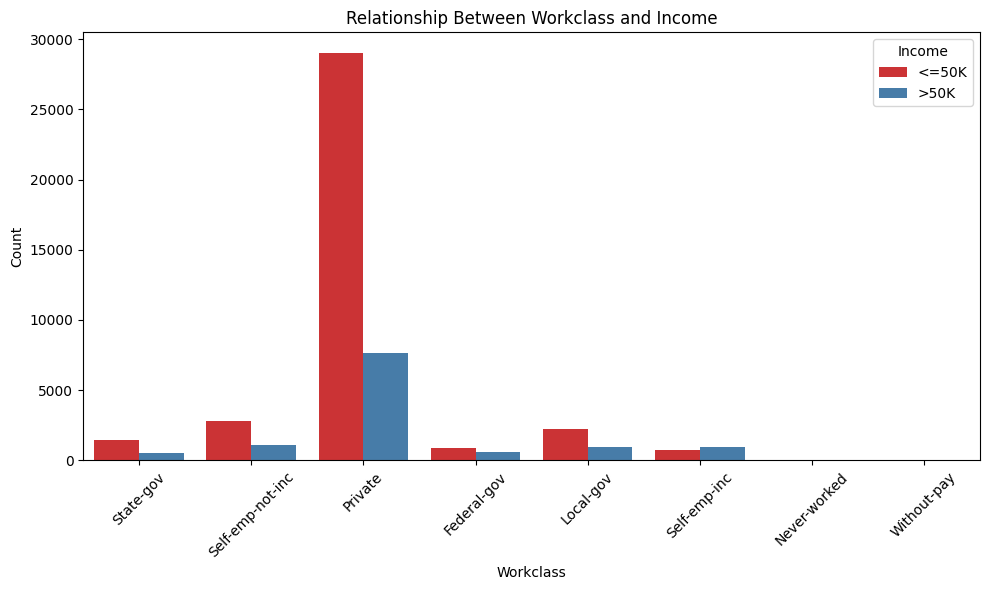

In [144]:
#workclass Vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between Workclass and Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

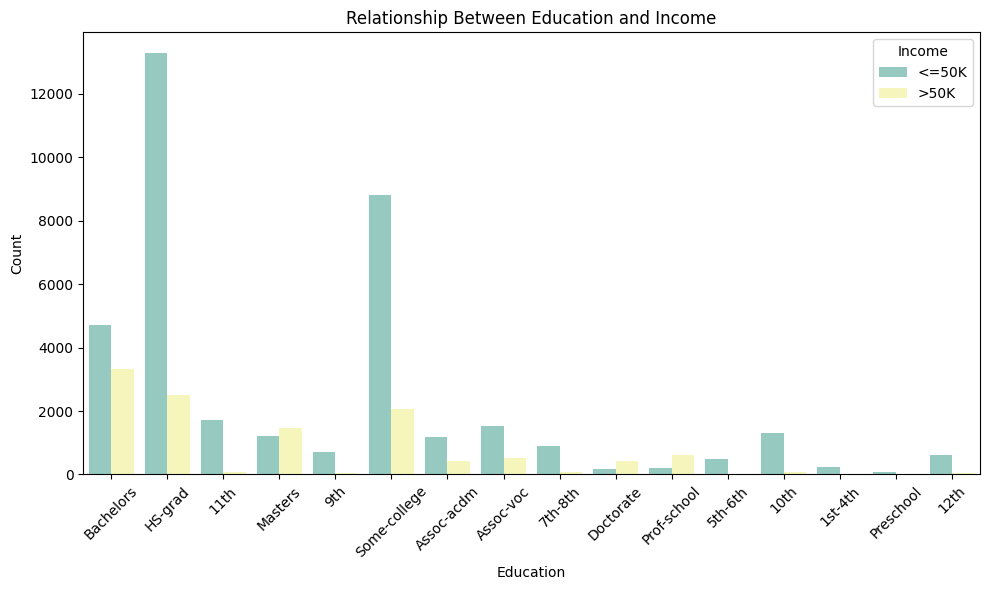

In [145]:
#education Vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=adult_df_cleaned, palette='Set3')

# add labels and title
plt.title('Relationship Between Education and Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

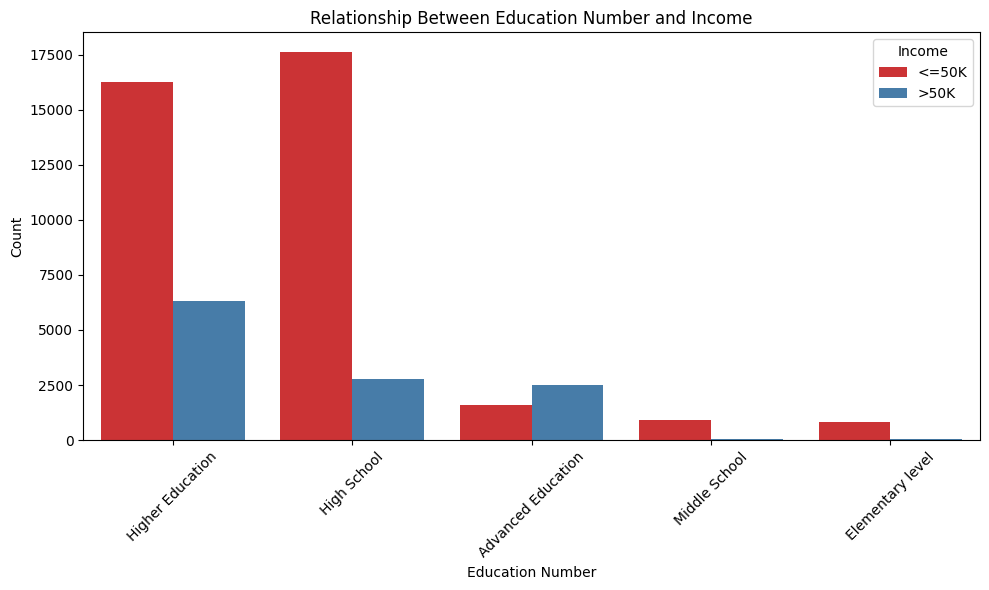

In [146]:
# comparing education level with income
# define the bins for education
def assign_education_bin(row):
    if row['education-num'] <= 3:
        return 'Elementary level'
    elif row['education-num'] == 4:
        return 'Middle School'
    elif 5 <= row['education-num'] <= 9:
        return 'High School'
    elif 10 <= row['education-num'] <= 13:
        return 'Higher Education'
    elif 14 <= row['education-num'] <= 16:
        return 'Advanced Education'

# apply the function to create a new 'education_bin' column
adult_df_cleaned['education_bin'] = adult_df_cleaned.apply(assign_education_bin, axis=1)

# display the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='education_bin', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between Education Number and Income')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [147]:
adult_df_cleaned['education']

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
           ...    
48837    Bachelors
48838      HS-grad
48839    Bachelors
48840    Bachelors
48841    Bachelors
Name: education, Length: 48842, dtype: object

In [148]:
# # Set education as the index for better plotting
# #adult_df_cleaned.set_index('education', inplace=True)
# # Grouping the data by 'education' and 'income', and counting the occurrences
# grouped_data = adult_df_cleaned.groupby(['education', 'income']).size().unstack()
# # Plotting the stacked bar chart
# adult_df_cleaned.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# # Add labels and title
# plt.title('Income Distribution by Education Level', fontsize=14)
# plt.xlabel('Education Level')
# plt.ylabel('Count of Income')

# # Show legend and plot
# plt.legend(title='Income')
# plt.tight_layout()
# plt.show()

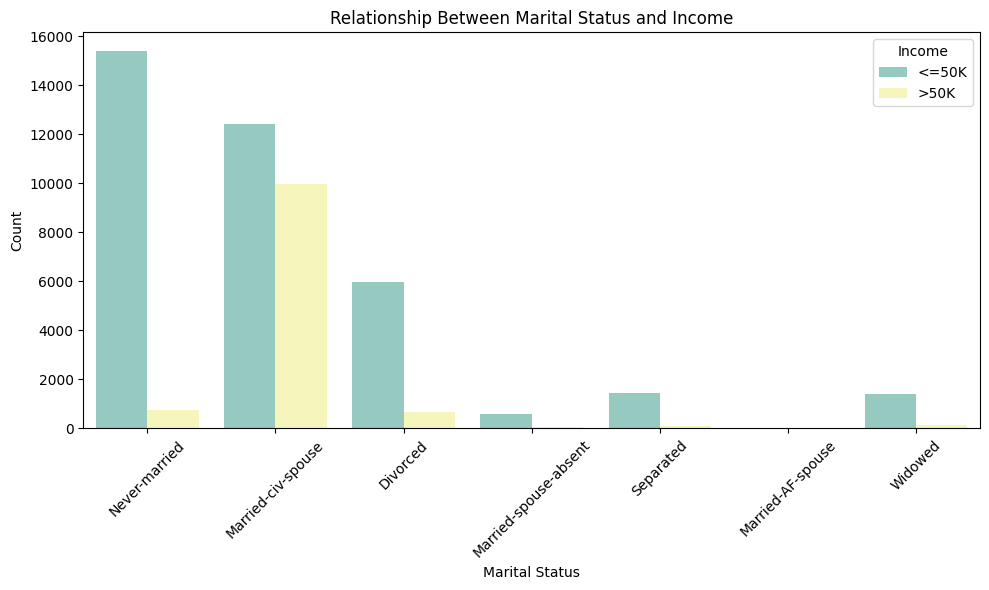

In [149]:
#marital status vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=adult_df_cleaned, palette='Set3')

# add labels and title
plt.title('Relationship Between Marital Status and Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

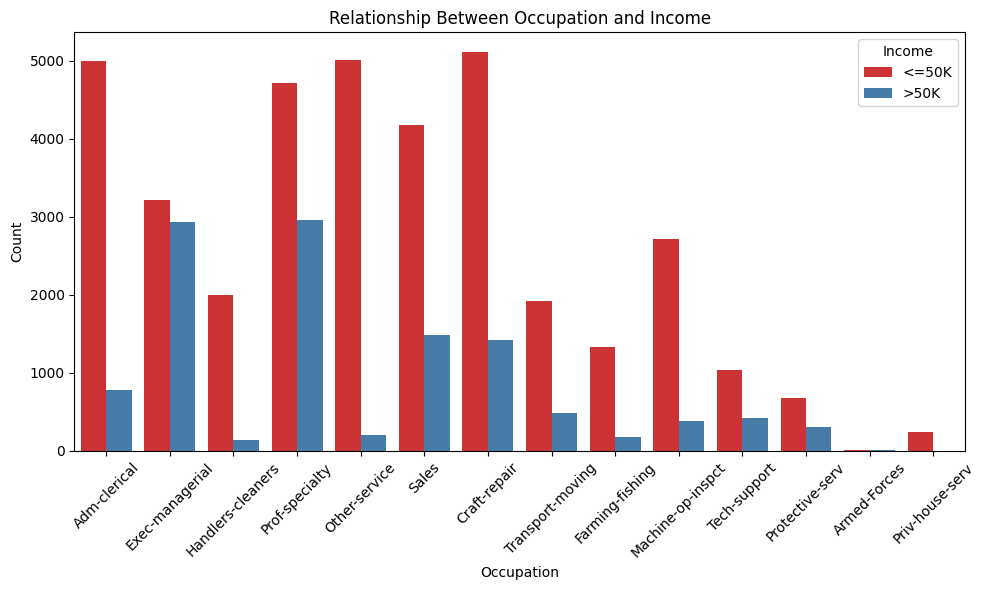

In [150]:
#occupation vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between Occupation and Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

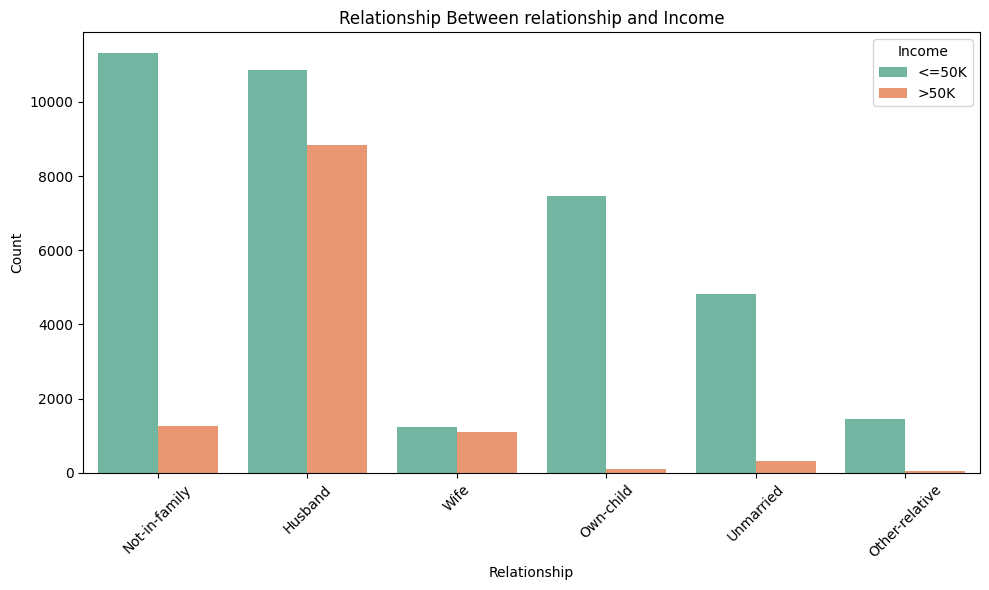

In [151]:
#relationship vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=adult_df_cleaned, palette='Set2')

# add labels and title
plt.title('Relationship Between relationship and Income')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

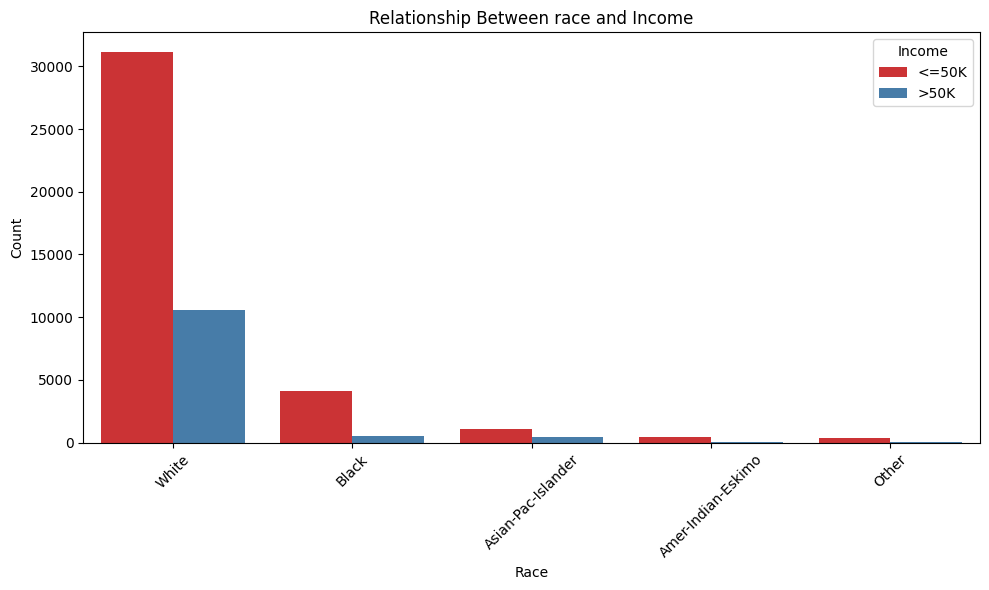

In [152]:
#race vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between race and Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

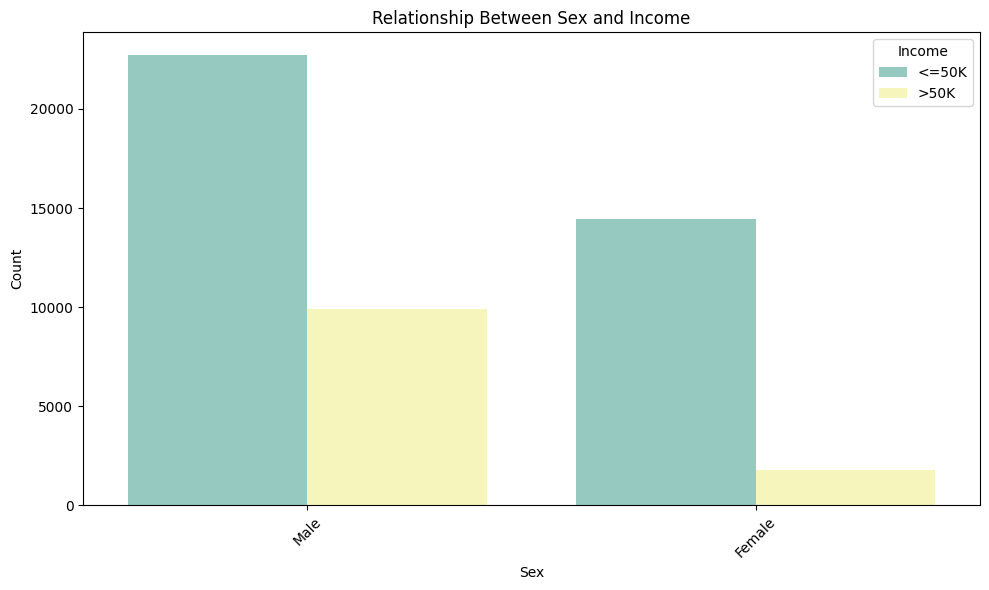

In [153]:
#sex vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=adult_df_cleaned, palette='Set3')

# add labels and title
plt.title('Relationship Between Sex and Income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

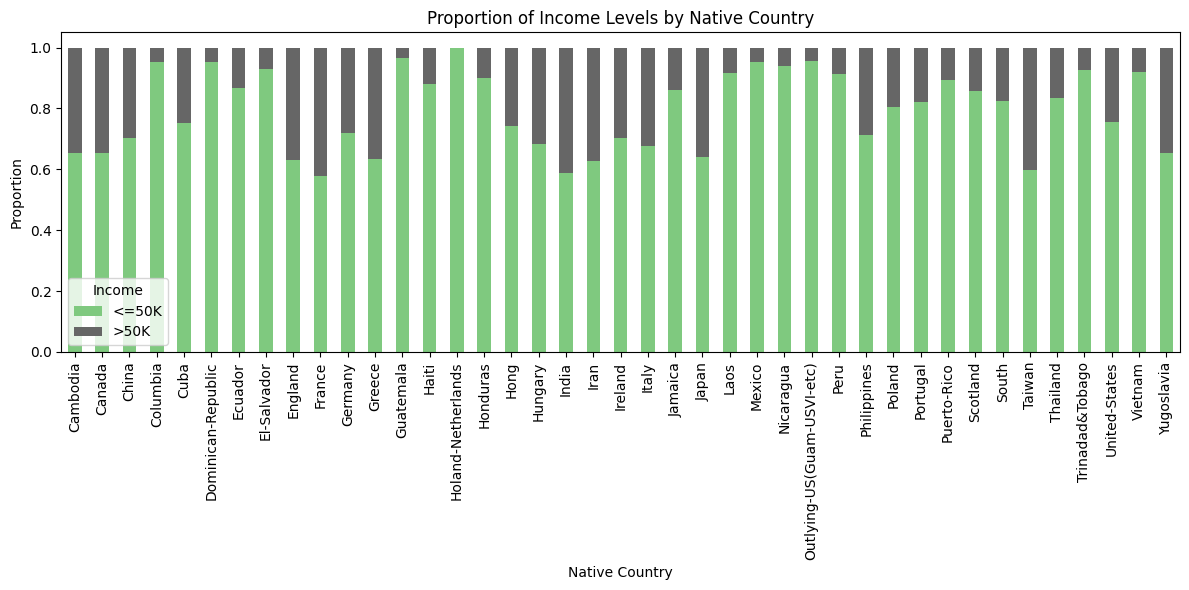

In [154]:
#native country vs income
# normalizing the data to show proportions
proportions = adult_df_cleaned.groupby(['native-country', 'income']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# plotting the proportional stacked bar plot
proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')

# adding title and labels
plt.title('Proportion of Income Levels by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Income')

plt.tight_layout()
plt.show()

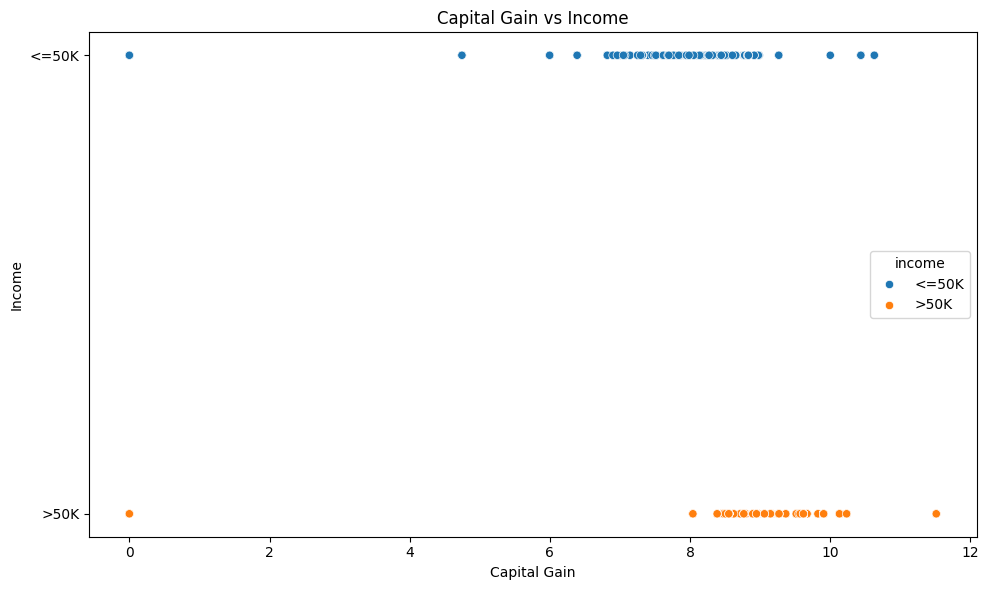

In [155]:
#capital gain vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital-gain-log', y='income', hue='income', data = adult_df_cleaned)

# Add labels and title
plt.title('Capital Gain vs Income')
plt.xlabel('Capital Gain')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

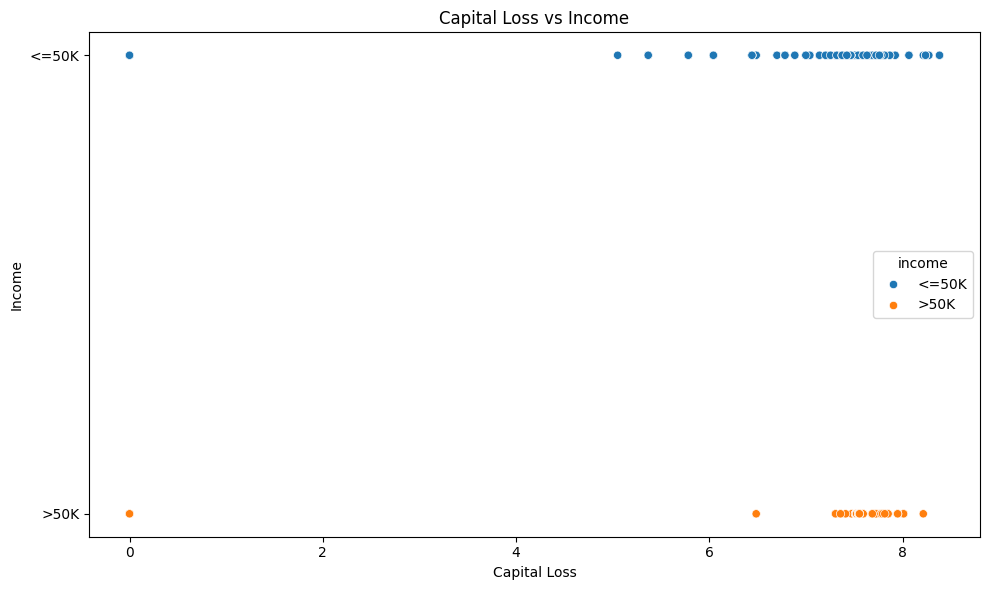

In [156]:
#capital loss vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital-loss-log', y='income', hue='income', data = adult_df_cleaned)

# add labels and title
plt.title('Capital Loss vs Income')
plt.xlabel('Capital Loss')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

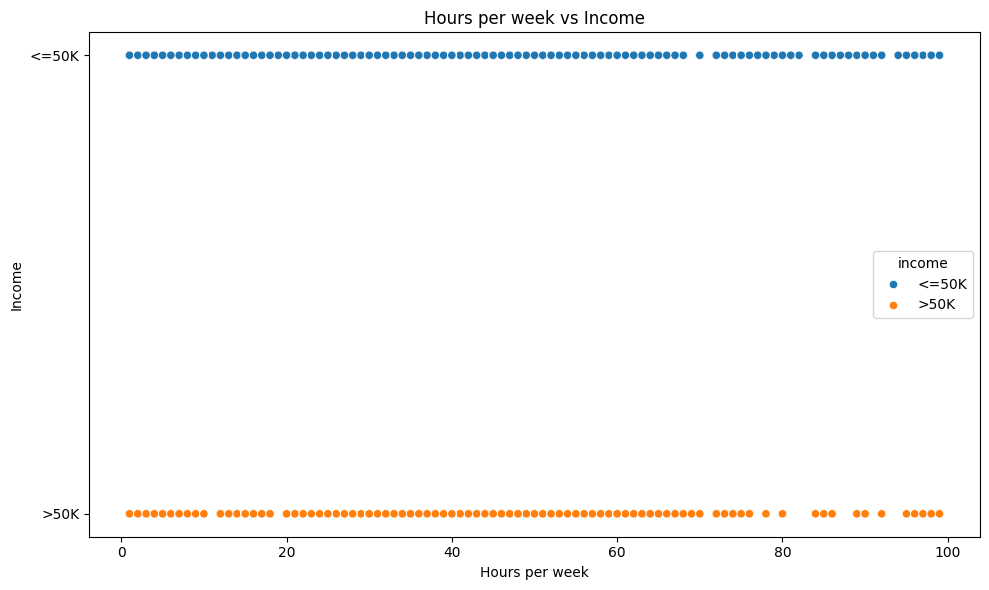

In [157]:
#hours per week vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours-per-week', y='income', hue='income', data = adult_df_cleaned)

# add labels and title
plt.title('Hours per week vs Income')
plt.xlabel('Hours per week')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

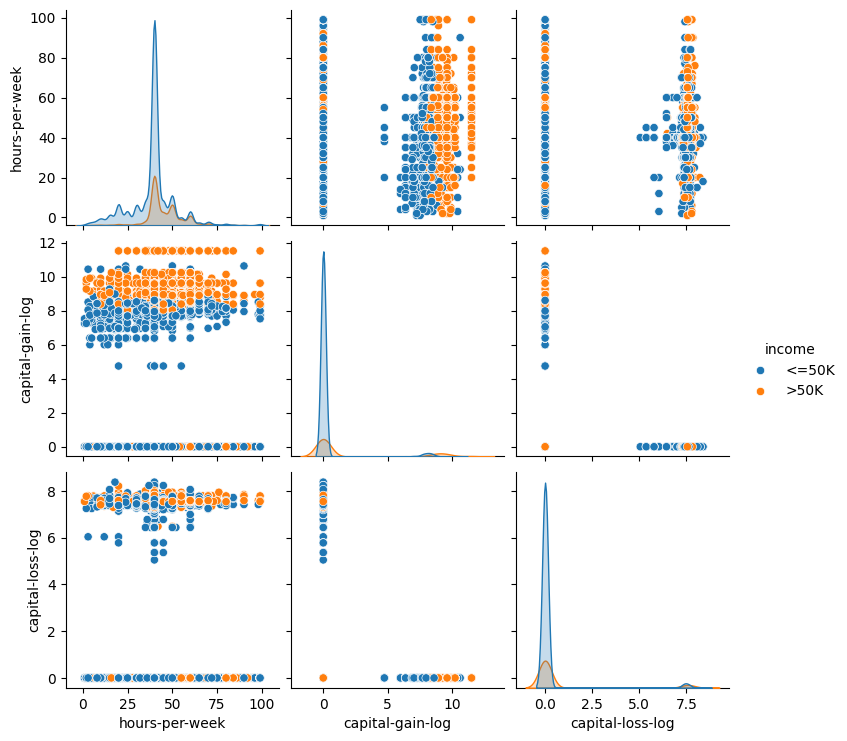

In [158]:
#pairwise scatter plots for numerical features
sns.pairplot(adult_df_cleaned[['hours-per-week', 'capital-gain-log', 'capital-loss-log', 'income']], hue='income')
plt.show()

                       age  education-num  hours-per-week  capital-gain-log  \
age               1.000000       0.030940        0.071558          0.123892   
education-num     0.030940       1.000000        0.143689          0.129068   
hours-per-week    0.071558       0.143689        1.000000          0.084471   
capital-gain-log  0.123892       0.129068        0.084471          1.000000   
capital-loss-log  0.051706       0.078352        0.051705         -0.065919   

                  capital-loss-log  
age                       0.051706  
education-num             0.078352  
hours-per-week            0.051705  
capital-gain-log         -0.065919  
capital-loss-log          1.000000  


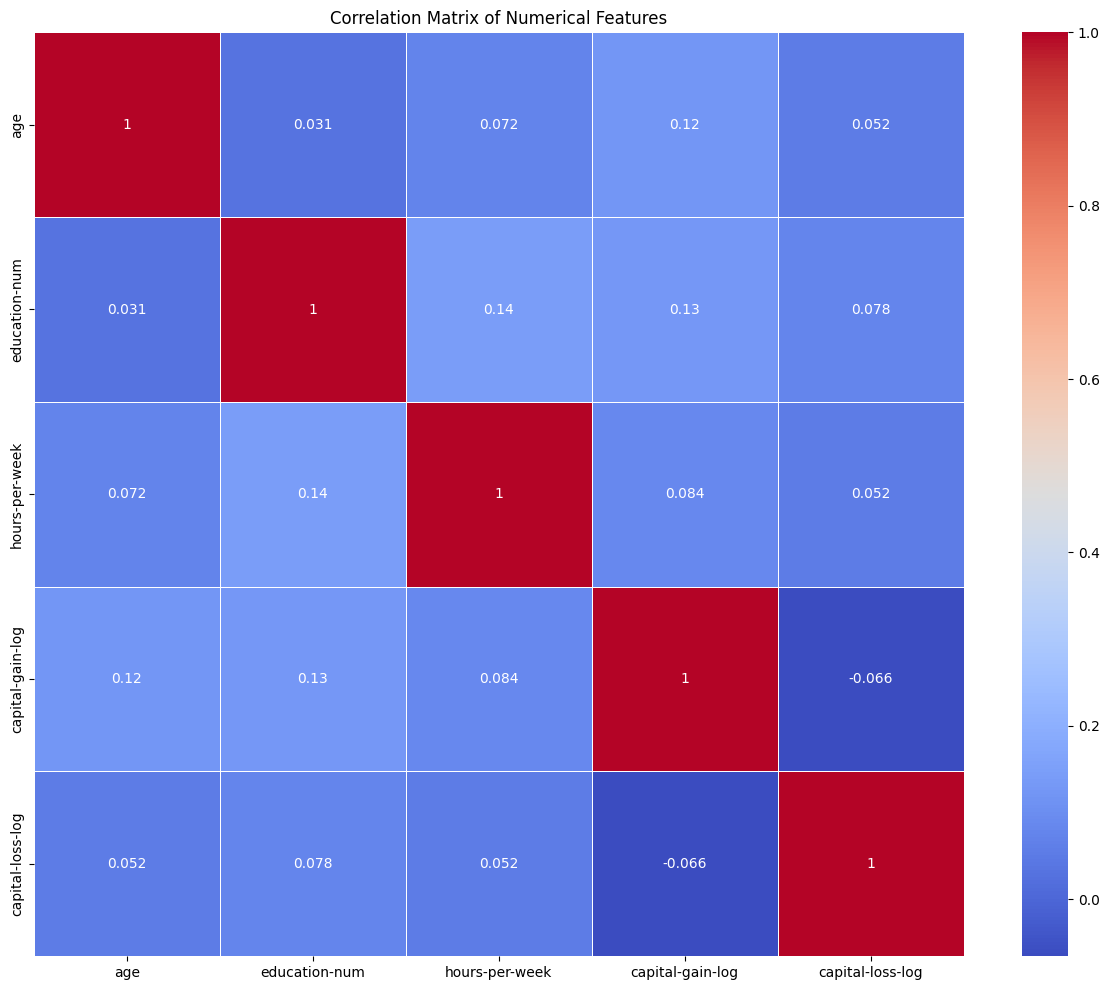

In [159]:
# correlation Analysis for Numerical Variables
# selecting numerical columns for correlation
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain-log', 'capital-loss-log']

# correlation matrix
corr_matrix = adult_df_cleaned[numerical_cols].corr(method = 'pearson')
print(corr_matrix)

# plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Based on the above correlation matrix we can say that none of the numerical features is strongly correlated 
with each other.**

**Multivariate Analysis**

In [160]:
# from mpl_toolkits.mplot3d import Axes3D

# # Create a 3D scatter plot
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Map income categories to colors
# colors = {'<=50K': 'green', '>50K': 'red'}
# income_colors = adult_df_cleaned['income'].map(colors)

# # Plot age, capital_gain, hours_per_week in 3D
# ax.scatter(adult_df_cleaned['age'], adult_df_cleaned['capital-gain-log'], 
#            adult_df_cleaned['hours-per-week-clipped'], c=income_colors, s=50)
# legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='<=50K', 
#                             markerfacecolor='blue', markersize=10),
#                  plt.Line2D([0], [0], marker='o', color='w', label='>50K', 
#                             markerfacecolor='red', markersize=10)]

# # Set labels
# ax.set_xlabel('Age')
# ax.set_ylabel('Capital Gain')
# ax.set_zlabel('Hours per Week')


# ax.legend(handles=legend_labels, title='Income')
# ax.set_title('3D Plot: Age, Capital Gain, and Hours per Week')

# plt.show()

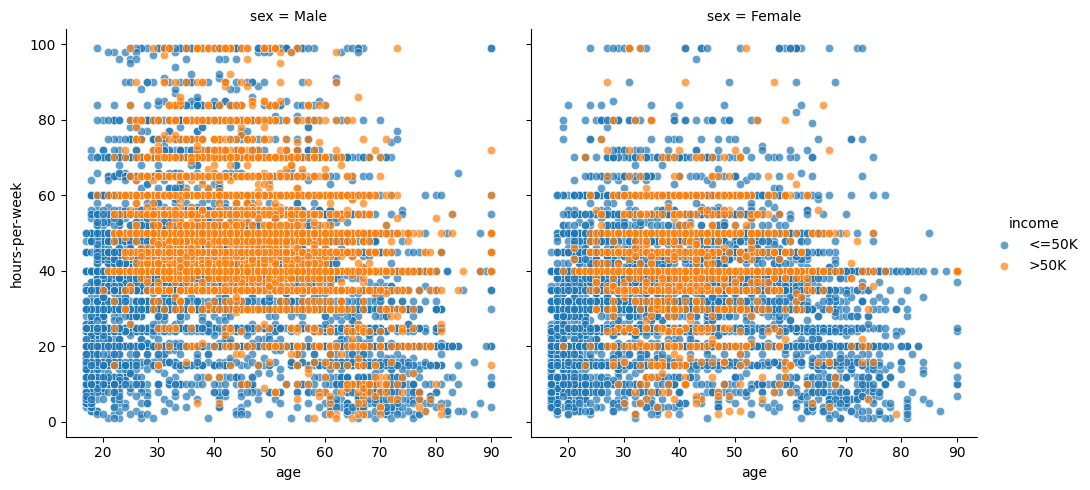

In [161]:
# Create a FacetGrid with age, hours_per_week, and income
g = sns.FacetGrid(adult_df_cleaned, col="sex", hue="income", height=5)
g.map(sns.scatterplot, "age", "hours-per-week", alpha=0.7)
g.add_legend()
plt.show()

In [162]:
adult_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               48842 non-null  int64   
 1   workclass         48842 non-null  object  
 2   fnlwgt            48842 non-null  int64   
 3   education         48842 non-null  object  
 4   education-num     48842 non-null  int64   
 5   marital-status    48842 non-null  object  
 6   occupation        48842 non-null  object  
 7   relationship      48842 non-null  object  
 8   race              48842 non-null  object  
 9   sex               48842 non-null  object  
 10  capital-gain      48842 non-null  int64   
 11  capital-loss      48842 non-null  int64   
 12  hours-per-week    48842 non-null  int64   
 13  native-country    48842 non-null  object  
 14  income            48842 non-null  object  
 15  capital-gain-log  48842 non-null  float64 
 16  capital-loss-log  4884

In [163]:
#relationship between education_bin,workclass,income and occupation
#cross-tabulation of education_bin,workclass,income and occupation
cross_tab = pd.crosstab([adult_df_cleaned['education_bin'], adult_df_cleaned['workclass']], 
                        [adult_df_cleaned['income'], adult_df_cleaned['occupation']])

cross_tab

income                                     <=50K                            \
occupation                          Adm-clerical Armed-Forces Craft-repair   
education_bin      workclass                                                 
Advanced Education Federal-gov                 3            0            1   
                   Local-gov                   9            0            0   
                   Private                    50            0           11   
                   Self-emp-inc                2            0            2   
                   Self-emp-not-inc            1            0           10   
                   State-gov                  14            0            1   
Elementary level   Federal-gov                 1            0            1   
                   Local-gov                   1            0            0   
                   Private                    14            0          101   
                   Self-emp-inc                0            0            0   
                   Self-emp-not-inc            0            0           13   
                   State-gov                   0            0            0   
High School        Federal-gov               155            6           27   
                   Local-gov                 139            0           97   
                   Never-worked                1            0            3   
                   Private                  1645            0         2594   
                   Self-emp-inc               14            0           54   
                   Self-emp-not-inc           23            0          385   
                   State-gov                 107            0           41   
                   Without-pay                 2            0            1   
Higher Education   Federal-gov               169            4           30   
                   Local-gov                 217            0           53   
                   Never-worked                0            0            0   
                   Private                  2156            0         1206   
                   Self-emp-inc               17            0           46   
                   Self-emp-not-inc           27            0          222   
                   State-gov                 211            0           28   
                   Without-pay                 1            0            0   
Middle School      Federal-gov                 1            0            0   
                   Local-gov                   2            0            5   
                   Never-worked                0            0            0   
                   Private                    16            0          140   
                   Self-emp-inc                0            0            6   
                   Self-emp-not-inc            1            0           28   
                   State-gov                   0            0            1   
                   Without-pay                 0            0            0   

income                                                               \
occupation                          Exec-managerial Farming-fishing   
education_bin      workclass                                          
Advanced Education Federal-gov                    9               0   
                   Local-gov                     18               0   
                   Private                      147               3   
                   Self-emp-inc                  13               0   
                   Self-emp-not-inc              26              13   
                   State-gov                     27               0   
Elementary level   Federal-gov                    0               0   
                   Local-gov                      0               1   
                   Private                        2              90   
                   Self-emp-inc                   1               1   
                   Self-emp-not-in

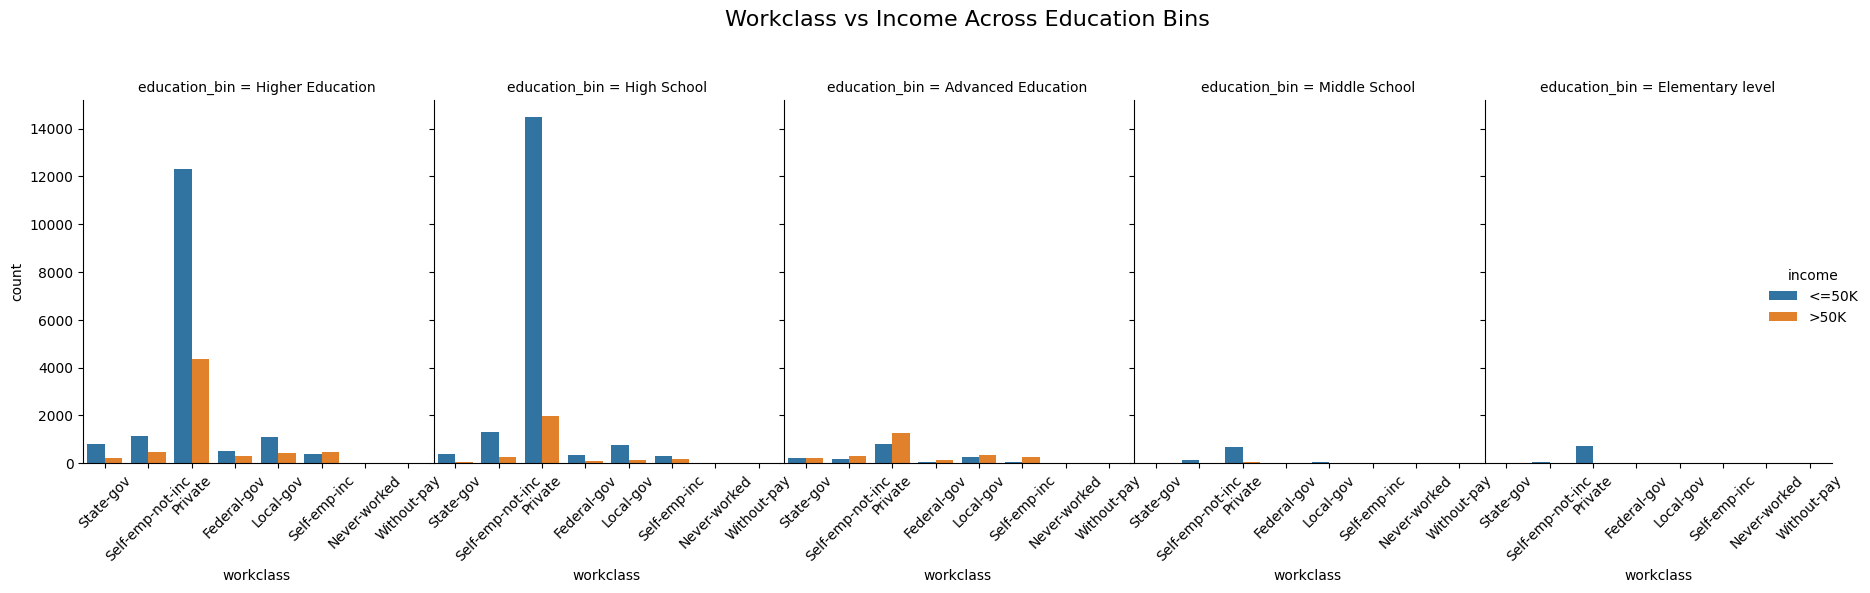

In [164]:
#relationship between education_bin,workclass,income and occupation in the form of visualizations
g = sns.catplot(x='workclass', hue='income', col='education_bin', data=adult_df_cleaned, 
                kind='count', height=8, aspect=2.5)
g.fig.set_size_inches(18, 5)
#rotate x-axis labels
g.set_xticklabels(rotation=45)

#adjust the layout to add space for the title and make it clearer
g.fig.subplots_adjust(top=0.8)
plt.suptitle('Workclass vs Income Across Education Bins', fontsize=16)

plt.show()

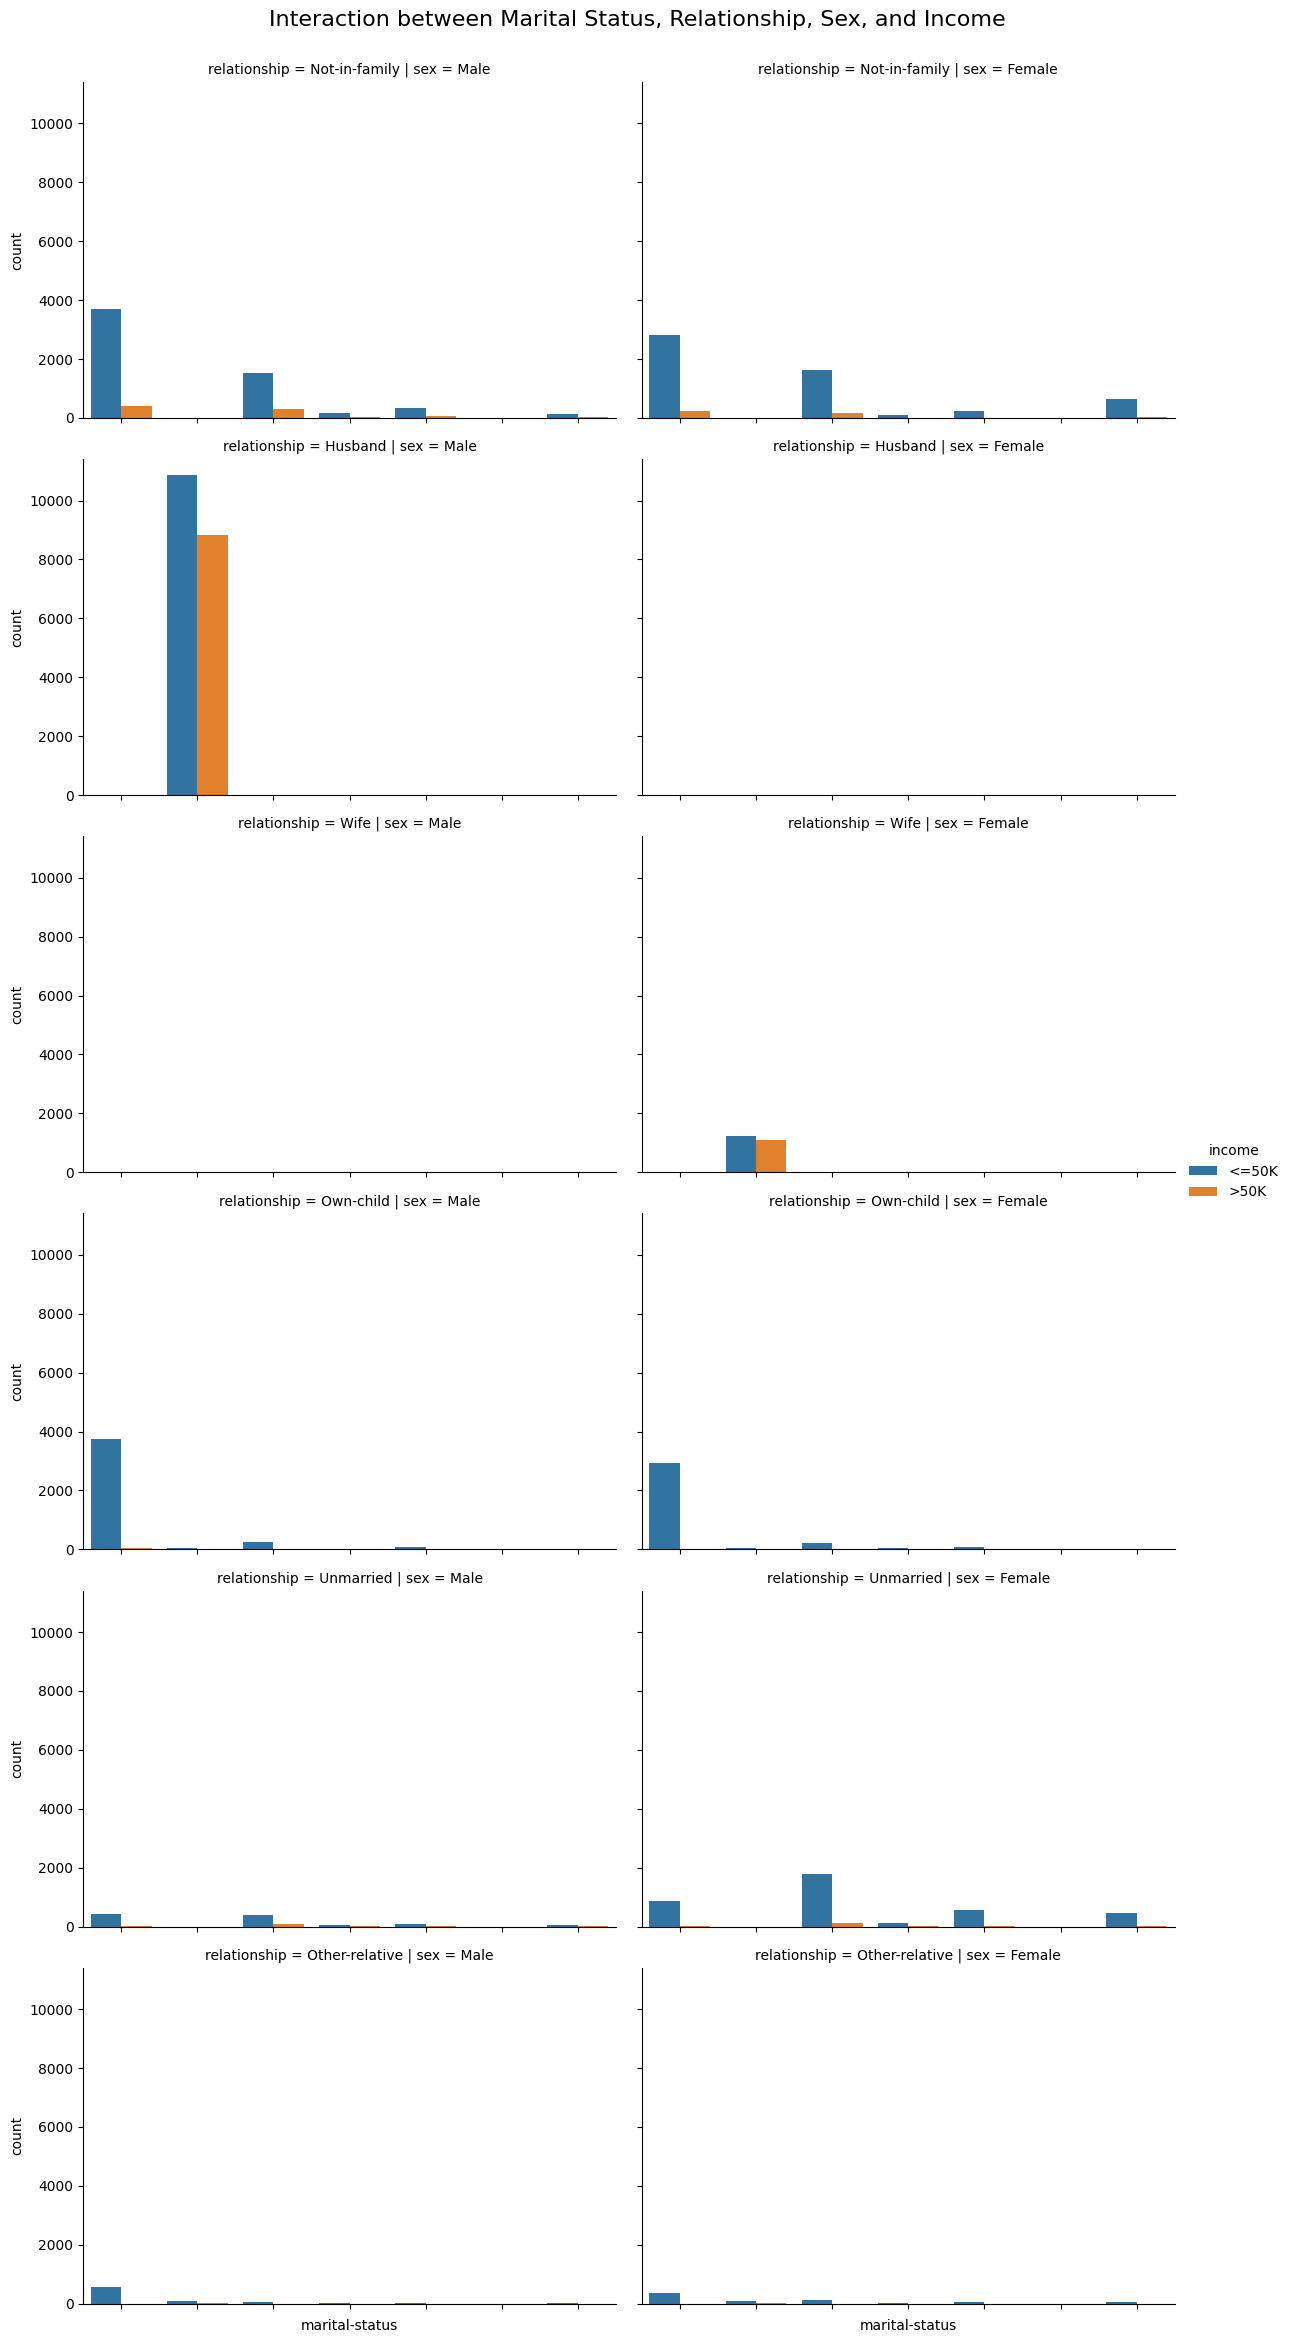

In [165]:
#relationship between marital status, relationship, sex and income
# use FacetGrid to explore the interaction
g = sns.catplot(x='marital-status', hue='income', col='sex', row='relationship', data=adult_df_cleaned, 
                kind='count', height=4, aspect=1.5)

# rotate x-axis labels
g.set_xticklabels(rotation=45)

# add title
plt.subplots_adjust(top=0.95)
plt.suptitle('Interaction between Marital Status, Relationship, Sex, and Income', fontsize=16)

plt.show()


In [166]:
#relationship of race,native-country,income
cross_tab = pd.crosstab([adult_df_cleaned['native-country']], 
                        [adult_df_cleaned['income'], adult_df_cleaned['race']])

cross_tab

income                                  <=50K                                 \
race                       Amer-Indian-Eskimo Asian-Pac-Islander Black Other   
native-country                                                                 
Cambodia                                    0                 15     2     0   
Canada                                      0                  0     0     2   
China                                       0                 87     0     0   
Columbia                                    1                  0     0     9   
Cuba                                        0                  0     4     3   
Dominican-Republic                          0                  1    17    21   
Ecuador                                     0                  0     1    11   
El-Salvador                                 0                  0     1     8   
England                                     0                  2     9     0   
France                                      0                  1     1     0   
Germany                                     1                  4     9     1   
Greece                                      0                  1     0     0   
Guatemala                                   0                  1     0     8   
Haiti                                       0                  1    65     0   
Holand-Netherlands                          0                  0     0     0   
Honduras                                    0                  0     3     1   
Hong                                        1                 18     0     0   
Hungary                                     0                  0     0     0   
India                                       0                 74     1     4   
Iran                                        0                  5     0     3   
Ireland                                     0                  1     0     0   
Italy                                       0                  0     0     0   
Jamaica                                     0                  0    86     2   
Japan                                       0                 29     4     1   
Laos                                        0                 22     0     0   
Mexico                                     11                  1     5    58   
Nicaragua                                   0                  1     3     4   
Outlying-US(Guam-USVI-etc)                  0                  2     8     0   
Peru                                        0                  0     0     3   
Philippines                                 1                206     2     0   
Poland                                      0                  2     0     0   
Portugal                                    0                  1     0     1   
Puerto-Rico                                 1                  1    11    29   
Scotland                                    0                  0     1     0   
South                                       1                 94     1     1   
Taiwan                                      0                 39     0     0   
Thailand                                    0                 21     1     0   
Trinadad&Tobago                             0                  4    19     1   
United-States                             398                397  3865   185   
Vietnam                                     0                 79     0     0   
Yugoslavia                                  0                  0     0     0   

income                                          >50K                           \
race                        White Amer-Indian-Eskimo Asian-Pac-Islander Black   
native-country                                                                  
Cambodia                        2                  0                 10     0   
Canada                        117                  0                  1     0   
China                           1                  0                 35   

**Feature Selection**

In [172]:
#dropping the final weight column 
adult_df_featsel = adult_df_cleaned.drop(columns=['fnlwgt','age_group','education_bin'])
adult_df_featsel

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain-log,capital-loss-log
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7.684784,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.000000,0.0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000000,0.0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0.000000,0.0
48838,64,Private,HS-grad,9,Widowed,Craft-repair,Other-relative,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,8.604471,0.0


In [173]:
adult_df_featsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               48842 non-null  int64  
 1   workclass         48842 non-null  object 
 2   education         48842 non-null  object 
 3   education-num     48842 non-null  int64  
 4   marital-status    48842 non-null  object 
 5   occupation        48842 non-null  object 
 6   relationship      48842 non-null  object 
 7   race              48842 non-null  object 
 8   sex               48842 non-null  object 
 9   capital-gain      48842 non-null  int64  
 10  capital-loss      48842 non-null  int64  
 11  hours-per-week    48842 non-null  int64  
 12  native-country    48842 non-null  object 
 13  income            48842 non-null  object 
 14  capital-gain-log  48842 non-null  float64
 15  capital-loss-log  48842 non-null  float64
dtypes: float64(2), int64(5), object(9)
memor

In [174]:
#feature selection by using random forest classifier
# Label Encoding for categorical columns
# Create a list of categorical columns
categorical_cols = adult_df_featsel.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to all categorical columns
for col in categorical_cols:
    adult_df_featsel[col] = label_encoder.fit_transform(adult_df_featsel[col])
    
# Split the data
X = adult_df_featsel.drop(columns='income')
y = adult_df_featsel['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Feature Importance using Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)
print(feat_importance_df)


             Feature  Importance
0                age    0.215326
11    hours-per-week    0.107684
6       relationship    0.107145
3      education-num    0.090079
9       capital-gain    0.082368
5         occupation    0.079216
4     marital-status    0.071128
13  capital-gain-log    0.068468
1          workclass    0.045634
2          education    0.032239
10      capital-loss    0.026131
14  capital-loss-log    0.025087
12    native-country    0.018890
7               race    0.016937
8                sex    0.013668


In [179]:
#feature selection by using variance
df = adult_df_featsel.var()
df1 = df.apply(lambda x: '{:.6f}'.format(x))
df1.sort_values()

income                     0.182030
sex                        0.221618
race                       0.715692
workclass                  1.235790
education                 15.011692
occupation                15.950840
hours-per-week           153.547885
capital-loss          162412.669033
age                      187.978083
marital-status             2.273167
capital-loss-log           2.516133
relationship               2.566889
native-country            36.575392
capital-gain-log           5.980371
capital-gain        55532588.035659
education-num              6.609901
dtype: object

**By comparing the variances of different features, we observed that the features race and sex have 
the least variances.**

In [176]:
#feature selection by using correlation
correlation_matrix = adult_df_featsel.corr()

# Display correlation with respect to the target variable 'income'
correlation_with_target = correlation_matrix['income'].sort_values(ascending=False)
print(correlation_with_target)

income              1.000000
education-num       0.332613
capital-gain-log    0.289144
age                 0.230369
hours-per-week      0.227687
capital-gain        0.223013
sex                 0.214628
capital-loss        0.147554
capital-loss-log    0.138297
education           0.080091
race                0.070934
occupation          0.042046
native-country      0.020019
workclass          -0.000532
marital-status     -0.199072
relationship       -0.253214
Name: income, dtype: float64


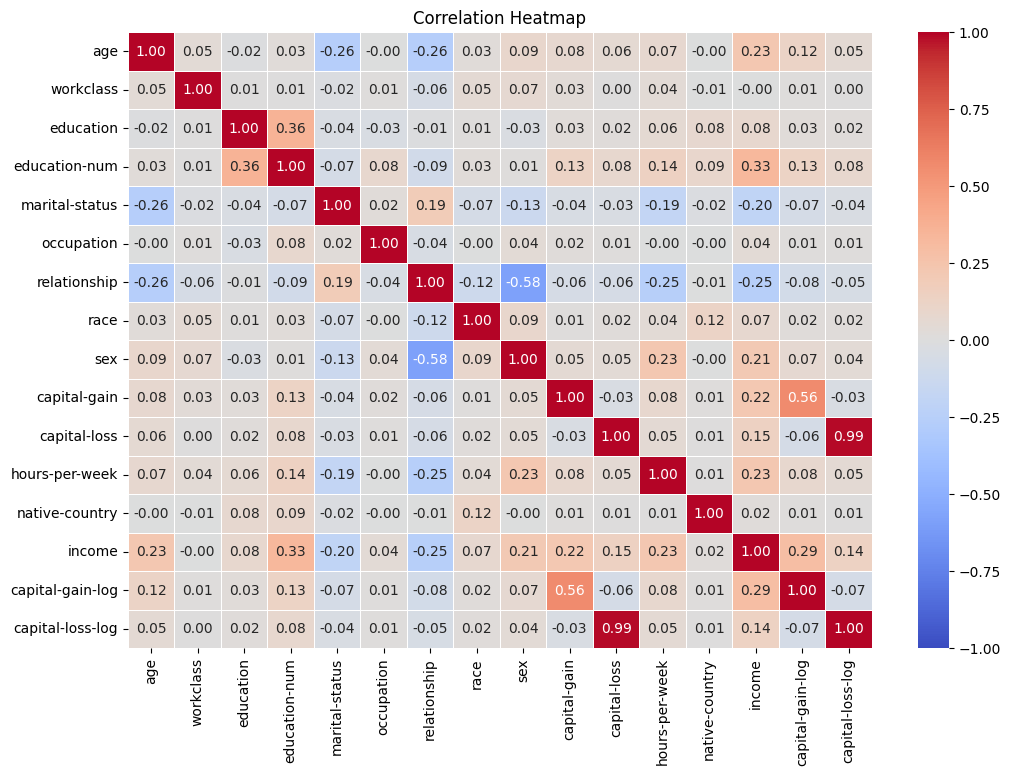

In [177]:
#heatmap for the above correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Keep:
# age
# hours-per-week
# relationship
# education-num
# capital-gain-log
# occupation
# marital-status
# capital-loss-log

In [182]:
#Logistic Regression
#selected features based on the above feature selection methods
selected_features = ['age', 'education-num', 'capital-gain-log', 'hours-per-week',
                     'relationship', 'marital-status', 'occupation']#,'capital-loss-log']

#filter the DataFrame to only include selected features
X = adult_df_featsel[selected_features]

#the target variable is 'income'
y = adult_df_featsel['income']

#convert categorical features (e.g., relationship, marital-status, occupation) using LabelEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

#split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

#train the model
log_reg_model.fit(X_train, y_train)

#make predictions on the test data
y_pred = log_reg_model.predict(X_test)

#evaluate the model using accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8163578667212611
Confusion Matrix:
[[6971  443]
 [1351 1004]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7414
           1       0.69      0.43      0.53      2355

    accuracy                           0.82      9769
   macro avg       0.77      0.68      0.71      9769
weighted avg       0.80      0.82      0.80      9769



In [189]:
# SVM model
# List of selected features (from feature importance analysis)
selected_features = ['age', 'education-num', 'capital-gain-log', 'hours-per-week',
                     'relationship', 'marital-status', 'occupation','capital-loss-log']

# Filter the DataFrame to only include selected features
X = adult_df_featsel[selected_features]

# The target variable is 'income'
y = adult_df_featsel['income']

# Convert categorical features (e.g., relationship, marital-status, occupation) using LabelEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Standardize the data (SVM models benefit from scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model using accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8035622888729655
Confusion Matrix:
[[7121  293]
 [1626  729]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7414
           1       0.71      0.31      0.43      2355

    accuracy                           0.80      9769
   macro avg       0.76      0.64      0.66      9769
weighted avg       0.79      0.80      0.77      9769



In [195]:
adult_df_cleaned['income'] = adult_df_cleaned['income'].map({'<=50K': 0, '>50K': 1})
# Filter non-zero capital gain and capital loss
non_zero_capital_gain = adult_df_cleaned[adult_df_cleaned['capital-gain'] > 0]
non_zero_capital_loss = adult_df_cleaned[adult_df_cleaned['capital-loss'] > 0]



#non_zero_capital_gain
# Calculate correlation for non-zero values
corr_gain = non_zero_capital_gain['capital-gain'].corr(non_zero_capital_gain['income'])
corr_loss = non_zero_capital_loss['capital-loss'].corr(non_zero_capital_loss['income'])

print(f'Correlation with non-zero Capital Gain: {corr_gain}')
print(f'Correlation with non-zero Capital Loss: {corr_loss}')

income
>50K     2491
<=50K    1544
Name: count, dtype: int64
income
>50K     1144
<=50K    1138
Name: count, dtype: int64


In [200]:
adult_df_cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain-log,capital-loss-log,age_group,education_bin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,NaN,7.684784,0.0,31-40,Higher Education
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,NaN,0.000000,0.0,41-50,Higher Education
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,NaN,0.000000,0.0,31-40,High School
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,NaN,0.000000,0.0,51-60,High School
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,NaN,0.000000,0.0,21-30,Higher Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,NaN,0.000000,0.0,31-40,Higher Education
48838,64,Private,321403,HS-grad,9,Widowed,Craft-repair,Other-relative,Black,Male,0,0,40,United-States,NaN,0.000000,0.0,61-70,High School
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,NaN,0.000000,0.0,31-40,Higher Education
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,NaN,8.604471,0.0,41-50,Higher Education


In [227]:
#checking feature importance of capital-gain and capital-loss using correlation

# Filter non-zero capital gain and capital loss
non_zero_capital_gain = adult_df_cleaned[adult_df_cleaned['capital-gain'] > 0]
non_zero_capital_loss = adult_df_cleaned[adult_df_cleaned['capital-loss'] > 0]

#non_zero_capital_gain
# Calculate correlation for non-zero values
corr_gain = non_zero_capital_gain['capital-gain'].corr(non_zero_capital_gain['income'])
corr_loss = non_zero_capital_loss['capital-loss'].corr(non_zero_capital_loss['income'])

print(f'Correlation with non-zero Capital Gain: {corr_gain}')
print(f'Correlation with non-zero Capital Loss: {corr_loss}')

Correlation with non-zero Capital Gain: 0.3301937405341022
Correlation with non-zero Capital Loss: 0.2871762131079482


In [228]:
#checking feature importance of capital-gain and capital-loss using chi suqared
from scipy.stats import chi2_contingency

# Create contingency table for capital gain and income
contingency_table = pd.crosstab(adult_df_cleaned['capital-gain'] > 0, adult_df_cleaned['income'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.0


In [229]:
#checking feature importance of capital-gain and capital-loss using full model

from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest model (or any other model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_
for name, importance in zip(X.columns, feature_importance):
    print(f"{name}: {importance}")

age: 0.23897311067349236
education-num: 0.14523521887776059
capital-gain-log: 0.1429246366596234
hours-per-week: 0.12457338125238011
relationship: 0.1119345753046524
marital-status: 0.10108161555688101
occupation: 0.08672205612611363
capital-loss-log: 0.04855540554909659


In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define predictors and target
X = adult_df_cleaned[['capital-gain', 'capital-loss']]
y = adult_df_cleaned['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and Performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     11109
           1       0.81      0.29      0.42      3544

    accuracy                           0.81     14653
   macro avg       0.81      0.63      0.65     14653
weighted avg       0.81      0.81      0.77     14653

